# 1. Introduction

**Nama:** Ghassani Nurbaningtyas

**Batch:** SBY-003

**Dataset Background:**

This dataset belongs to an insurance company aiming to predict customer interest in purchasing vehicle insurance, alongside existing health insurance coverage.

**Objective:**

This project aims to create supervised machine learning to predict customer interest in purchasing vehicle insurance. Machine Learning used are SVM, KNN, Decision Tree, Boosting and Random Forest. The evaluation metrics used is Precision because it is to predict customers who are really interested.

[Dataset](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv) [Deploy](https://huggingface.co/spaces/ghtyas/InsurancePredict)

# 2. Import Libraries

In [121]:
# For Basic EDA
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.under_sampling import RandomUnderSampler
# from feature_engine.outliers import Winsorizer

# For Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, roc_auc_score

# For Count Train & Predict Time
import time

# For Model Inference
import pickle

# For Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Show All Column
pd.set_option('display.max_columns', None)

# For ignore warning
import warnings
warnings.filterwarnings('ignore')

#--------------------------------------
# For load data in drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Data Loading

In [122]:
# Load Dataset
# df = pd.read_csv('insurance.csv')

df_ori = pd.read_csv('/content/drive/MyDrive/insurance.csv')

# Variabel untuk dataset
df = df_ori.copy()

# Show top 5 data
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [123]:
# Show bottom 5 data
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


Dataset contains information:

| Variable	| Definition |
|:--:|:--:|
| Id |	Unique ID for the customer |
| Gender	| Gender of the customer |
| Age |	Age of the customer |
| Driving_License |	0 : Customer does not have DL, 1 : Customer already has DL |
| Region_Code |	Unique code for the region of the customer |
| Previously_Insured |	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance |
| Vehicle_Age	| Age of the Vehicle |
| Vehicle_Damage |	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past |
| Annual_Premium	| The amount customer needs to pay as premium in the year |
| Policy_Sales_Channel	| Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc |
| Vintage |	Number of Days, Customer has been associated with the company |
| Response |	1 : Customer is interested, 0 : Customer is not interested |

In [124]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


If we look at the minimum value, only the categorical column has a value of 0. Let's check the missing value.

In [125]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no missing values. Let's check the dataset information

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


The dataset consists of 381,109 data and 12 columns. Lets try to check the duplicate data

In [127]:
df.duplicated().sum()

0

There is no duplicated data.

## 3.1 Rename Column

To make it easier to work with, I'll change the column names to all lower

In [128]:
# Rename Column
df.columns = df.columns.str.lower()

## 3.2 Add New Columns

### 3.2.1 Region Code Category

Because region codes have many unique values, I decided to categorize region codes based on customers who are interested - customers who are not interested based on the percentage of customer responses.
The categorization:
- 0-5% = Small Chance
- 6-15% = Medium Chance
- 16-20% = High Chance

In [129]:
# Show percentage by response
reg_code = df.groupby('region_code').mean()['response'].sort_values(ascending=False).reset_index()

small = reg_code[reg_code['response']<=0.05]['region_code']
medium = reg_code[(reg_code['response']>0.05) & (reg_code['response']<=0.15)]['region_code']
high = reg_code[reg_code['response']>0.15]['region_code']

list_small = small.to_list()
list_med = medium.to_list()
list_high = high.to_list()

def final(x):
  if x in list_small:
    return "small chance"
  elif x in list_med:
    return "medium chance"
  elif x in list_high:
    return "high chance"

df['reg_code_cat'] = df['region_code'].apply(final)

Region code column is successfully categorized

### 3.2.2 Policy Sales Channel Category

Because policy channels have many unique values, I decided to categorize policy channels based on customers who are interested - customers who are not interested seen from the percentage of customer responses.
The categorization:
- 0-20% = Small Chance
- 20-40% = Medium Chance
- 40-100% = High Chance

In [130]:
# Show percentage by response
df.groupby('policy_sales_channel').mean()['response'].sort_values(ascending=False)

policy_sales_channel
123.0    1.000000
43.0     1.000000
27.0     0.333333
28.0     0.333333
36.0     0.326923
           ...   
112.0    0.000000
99.0     0.000000
137.0    0.000000
50.0     0.000000
84.0     0.000000
Name: response, Length: 155, dtype: float64

Then we categorize

In [131]:
# Show percentage by response
pol_chn = df.groupby('policy_sales_channel').mean()['response'].sort_values(ascending=False).reset_index()

small = pol_chn[pol_chn['response']<=0.2]['policy_sales_channel']
medium = pol_chn[(pol_chn['response']>0.2) & (pol_chn['response']<=0.4)]['policy_sales_channel']
high = pol_chn[pol_chn['response']>0.4]['policy_sales_channel']

list_small = small.to_list()
list_med = medium.to_list()
list_high = high.to_list()

def final(x):
  if x in list_small:
    return "small chance"
  elif x in list_med:
    return "medium chance"
  elif x in list_high:
    return "high chance"

df['policy_sales_channel_cat'] = df['policy_sales_channel'].apply(final)

# Check new column
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,reg_code_cat,policy_sales_channel_cat
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,high chance,small chance
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,medium chance,small chance
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,high chance,small chance
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,medium chance,small chance
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,medium chance,small chance


The policy_sales_channel column is successfully categorized

### 3.2.3 Age Category

Because the age column has many unique values so that it is easier to analyze, we do a category for the age column.
Age Category based on [jurnal](https://www.researchgate.net/figure/Age-group-comparison-between-Young-adult-18-25-age-Adult-26-44-age-Middle-age_tbl1_338842581):
- Young adult (18-25 age)
- Adult (26-44 age)
- Middle-age (45-59 age)
- Old age (60 age)

In [132]:
# Function for categorize age
def umur(x):
  if x <= 25:
    return "young adult"
  elif x <= 44:
    return "adult"
  elif x <= 59:
    return "middle old"
  else:
    return "old"

# Apply to new column
df['age_cat'] = df['age'].apply(umur)

# Check new column
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,reg_code_cat,policy_sales_channel_cat,age_cat
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,high chance,small chance,adult
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,medium chance,small chance,old
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,high chance,small chance,middle old
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,medium chance,small chance,young adult
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,medium chance,small chance,adult


New Column successful made. Because there is no missing value and duplicated data, data is ready to use in exploratory data analysis.

# 4. Exploratory Data Analysis

## 4.1 Target

Because we will classify insurance customers who will be interested in our company's vehicle insurance. Therefore we will make `response` as the target column with a value of 1 meaning Customer is interested, 0 meaning Customer is not interested.

In [133]:
target = df['response'].value_counts().to_frame(name='count')
target['percentage'] = df['response'].value_counts(normalize=True)
target.reset_index(inplace=True)
target

,index,count,percentage
0,0,334399,0.877437
1,1,46710,0.122563


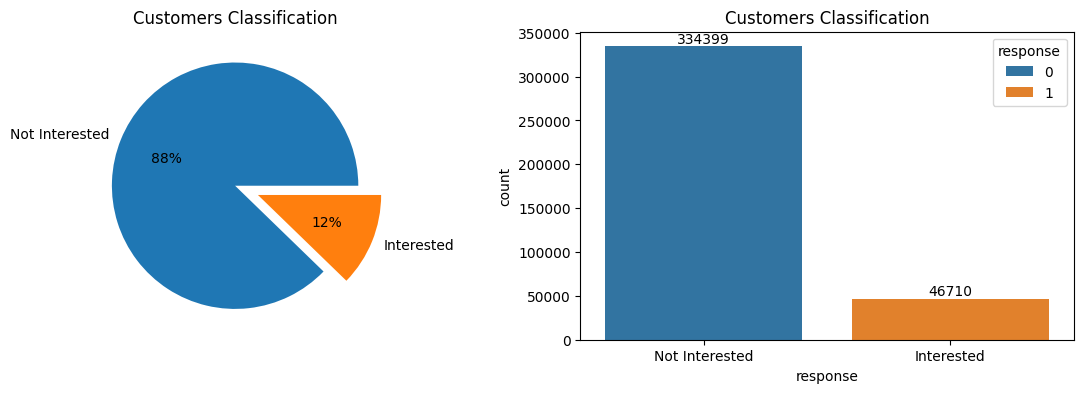

In [134]:
# Visualization
plt.figure(figsize=(14, 4))

# Pie Chart
plt.subplot(1,2,1)
plt.title('Customers Classification')
explode = [0,0.2]
labels = ['Not Interested','Interested']
plt.pie(target["percentage"], labels=labels,explode=explode, autopct='%.0f%%')

# Barplot
plt.subplot(1,2,2)
plt.title('Customers Classification')
ax = sns.countplot(data=df, x='response', hue='response')
labels = ['Not Interested','Interested']
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(labels)

plt.show()

The response column, which is the target column, has data on customers who are interested 12% of the total data with a total of 46710 customers. Customers who are not interested have a percentage of 88% of the total data with a total of 334399 customers. This shows that our dataset has an imbalance target data because it has a target data ratio of 1:7. Let's see how the characteristics of customers who are interested in our insurance:

In [135]:
# Customers Interested
df[df['response']==1]

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,reg_code_cat,policy_sales_channel_cat,age_cat
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,high chance,small chance,adult
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,high chance,small chance,middle old
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1,high chance,small chance,middle old
10,11,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1,medium chance,small chance,middle old
15,16,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1,medium chance,medium chance,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381057,381058,Male,40,1,46.0,0,1-2 Year,Yes,27508.0,26.0,189,1,medium chance,small chance,adult
381061,381062,Female,41,1,28.0,0,1-2 Year,Yes,37377.0,124.0,99,1,high chance,small chance,adult
381073,381074,Female,46,1,28.0,0,1-2 Year,Yes,34741.0,124.0,167,1,high chance,small chance,middle old
381075,381076,Female,61,1,28.0,0,1-2 Year,Yes,43875.0,26.0,139,1,high chance,small chance,old


In [136]:
# Customers Interested
df[df['response']==1].describe()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.000000,46710.0
mean,190152.264504,43.435560,0.999122,26.762963,0.003383,31604.092742,91.869086,154.112246,1.0
std,109797.768735,12.168924,0.029614,11.785157,0.058062,18646.508040,56.015074,83.738574,0.0
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,1.0
25%,94677.750000,35.000000,1.000000,21.000000,0.000000,24868.000000,26.000000,82.000000,1.0
50%,190495.500000,43.000000,1.000000,28.000000,0.000000,33002.000000,124.000000,154.000000,1.0
75%,285272.250000,51.000000,1.000000,30.000000,0.000000,41297.000000,136.000000,226.000000,1.0
max,381098.000000,83.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.0


We can see from the data above, customers who are interested in our company's insurance have characteristics:
- The customer has been in contact with the company for > 10 days
- Customers who have a Driver's License (SIM)
- Customers who do not have Vehicle Insurance
- Customers who experience vehicle damage

## 4.2 Numerikal

We check the correlation between the independent columns using a heat map

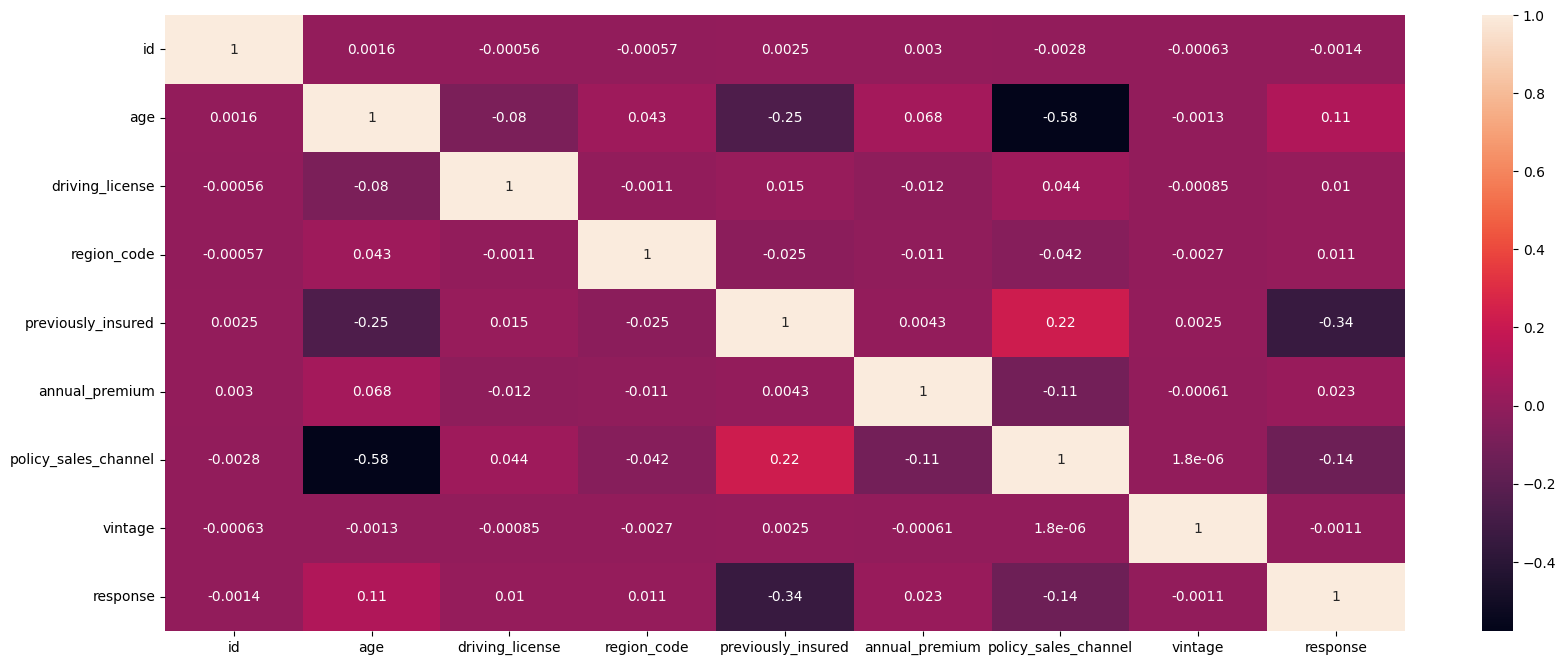

In [137]:
# Visualize Correlation
corr = df.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True)
plt.show()

As can be seen from the heatmap, the columns that have a correlation with the target column are age, previously_insured, policy_sales_channel, and vintage.

In [138]:
# Function for check the data
def cek(df,  x):
    mean = df[x].mean()
    min = df[x].min()
    max = df[x].max()

    print(f'Nilai Minimum {x} = {min}')
    print(f'Nilai Maximum {x} = {max}')
    print(f'Nilai Rata-Rata {x} = {mean:.2f}')

    skew = df[x].skew()
    if skew < 0.5:
        print(f'Skewness {x} = {skew}, Distribution is normal')
    else:
        print(f'Skewness {x} = {skew}, Distribution is not normal')

### 4.2.1 Annual Premium

Nilai Minimum annual_premium = 2630.0
Nilai Maximum annual_premium = 540165.0
Nilai Rata-Rata annual_premium = 30564.39
Skewness annual_premium = 1.7660872148961309, Distribution is not normal


Text(0.5, 1.0, 'Annual Premi Distribution')

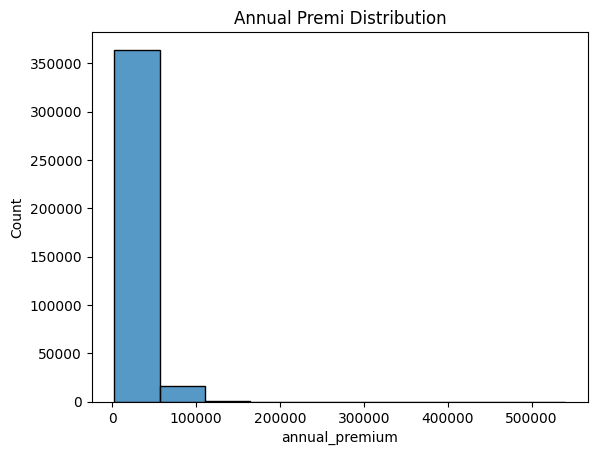

In [139]:
# annual_premium check
cek(df, 'annual_premium')

# Visualize
sns.histplot(df['annual_premium'], bins=10);
plt.title('Annual Premi Distribution')

We can see that the annual premium column has a maximum value of 540,156 with a minimum value of 2630. It can be seen that the distribution is highly skewed with many values collected in the range 0-100,000. Let's look at the data distribution for the target column.

In [140]:
# Group by
annual_p = df.groupby('response')['annual_premium'].mean().reset_index()
annual_p

,response,annual_premium
0,0,30419.160276
1,1,31604.092742


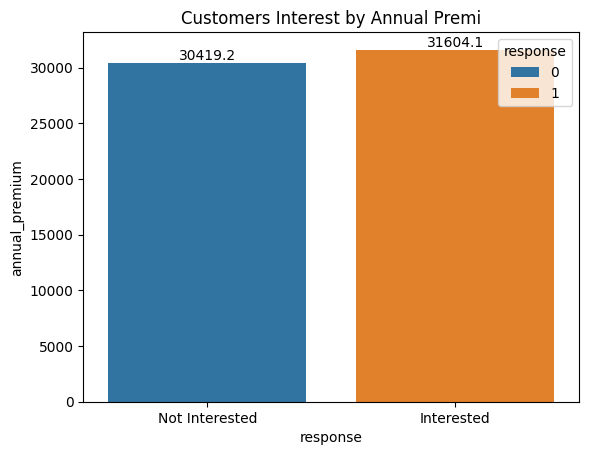

In [141]:
# Visualize
ax = sns.barplot(data=df,x='response', y='annual_premium', hue='response', errorbar=None)
plt.xlabel('response')
plt.ylabel('annual_premium')
labels = ['Not Interested','Interested']
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(labels)
plt.title('Customers Interest by Annual Premi')
plt.show()

Annual premi that does not interest with insurance
Nilai Minimum annual_premium = 2630.0
Nilai Maximum annual_premium = 540165.0
Nilai Rata-Rata annual_premium = 31604.09
Skewness annual_premium = 2.3941024886539557, Distribution is not normal
 
Annual premium that interest with insurance
Nilai Minimum annual_premium = 2630.0
Nilai Maximum annual_premium = 540165.0
Nilai Rata-Rata annual_premium = 30419.16
Skewness annual_premium = 1.643426911500396, Distribution is not normal


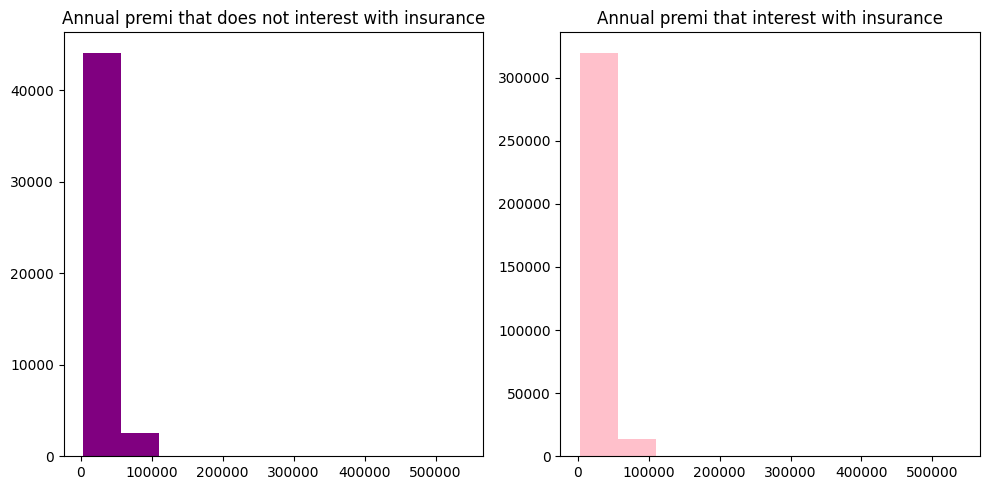

In [142]:
# Show annual premium by target
interest = df[df['response'] == 0]['annual_premium'].reset_index()
no_interest = df[df['response'] == 1]['annual_premium'].reset_index()

# Show annual premium max, minimum dan average
print("Annual premi that does not interest with insurance")
cek(no_interest, 'annual_premium')
print(" ")
print("Annual premium that interest with insurance")
cek(interest, 'annual_premium')

# Visualize
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
axes[0].hist(no_interest['annual_premium'], color='purple')
axes[0].set_title("Annual premi that does not interest with insurance")
axes[1].hist(interest['annual_premium'], color='pink')
axes[1].set_title("Annual premi that interest with insurance")
plt.tight_layout()

It turns out that customers who are interested in insurance have an annual_balance value of 2630 - 540165. The range of annual premium values for customers who are interested and those who are not interested in insurance is the same. But we can see, the difference lies in the average value. Customers who are interested in insurance have a lower average annual premium at 30419.

### 4.2.2 Vintage

This column contains information on the total days the Customer has been associated with the company. Let's look at the data distribution first

Nilai Minimum vintage = 10
Nilai Maximum vintage = 299
Nilai Rata-Rata vintage = 154.35
Skewness vintage = 0.0030295168899980816, Distribution is normal


Text(0.5, 1.0, 'Customers Lifetime')

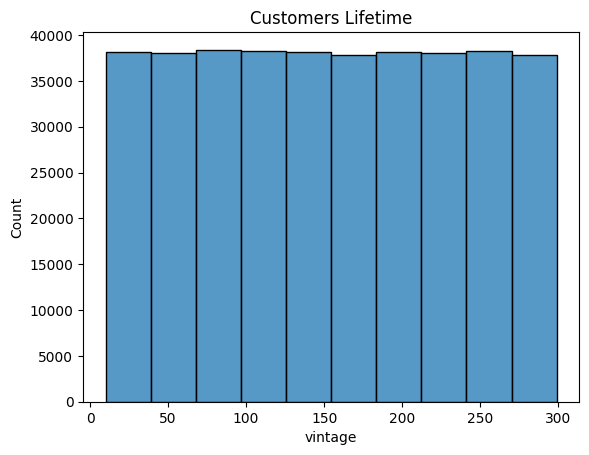

In [143]:
# Check data vintage
cek(df, 'vintage')

# Visualize
sns.histplot(df['vintage'], bins=10);
plt.title('Customers Lifetime')

We can see in the dataset there are new customers with a total of 10 days of joining to old customers with a total of 299 days or 10 months of joining. Let's take a look at the customers who are interested in our company insurance, whose total joining days are what?

In [144]:
# Group by
day_join = df.groupby('response').agg(minimum=('vintage', 'min'), maksimum=('vintage', 'max'), average=('vintage', 'mean'))
day_join

,minimum,maksimum,average
response,,,
0,10,299,154.380243
1,10,299,154.112246


If we visualize it, it will look like:

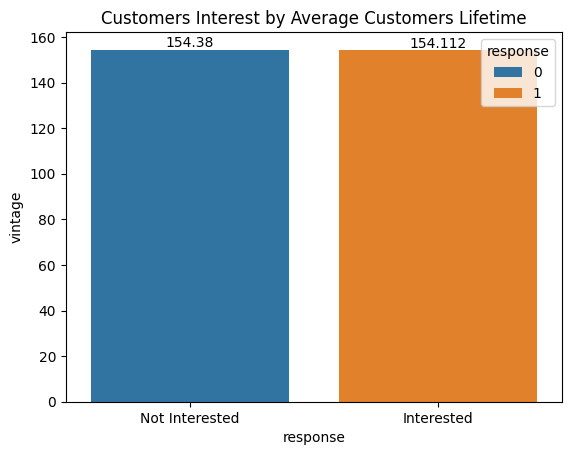

In [145]:
# Visualize
ax = sns.barplot(data=df,x='response', y='vintage', hue='response', errorbar=None)
plt.xlabel('response')
plt.ylabel('vintage')
labels = ['Not Interested','Interested']
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(labels)
plt.title('Customers Interest by Average Customers Lifetime')
plt.show()

From the data displayed, the average customers who are interested and those who are not interested in our insurance have a total joining days of 154 days. There is not even a difference in joining days from the minimum and maximum values. So we will not use this column because it has no correlation with the target column.

### 4.2.3 Age

This column contains information on the age of the customer.

Nilai Minimum age = 20
Nilai Maximum age = 85
Nilai Rata-Rata age = 38.82
Skewness age = 0.6725389977260843, Distribution is not normal


Text(0.5, 1.0, 'Age Distribution')

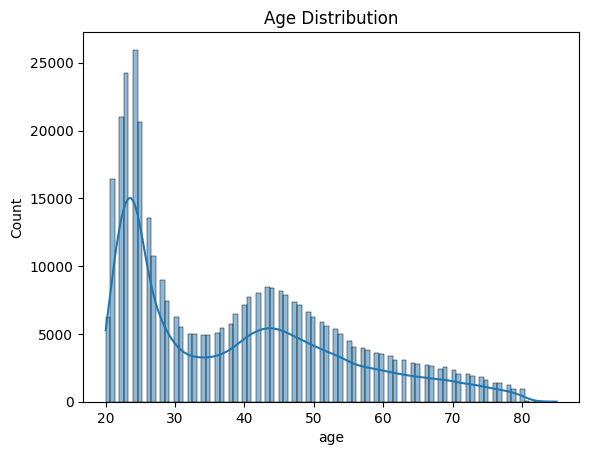

In [146]:
# Check data age column
cek(df, 'age')

# Visualize
sns.histplot(df['age'],kde=True);
plt.title('Age Distribution')

Our customers range in age from 20-85, with the largest age range being 20-30 years old. Let's look at the average age of customers who are interested in our insurance:

In [147]:
# Group by
cust_age = df.groupby('response').agg(minimum=('age', 'min'), maksimum=('age', 'max'), average=('age', 'mean'))
cust_age

,minimum,maksimum,average
response,,,
0,20,85,38.178227
1,20,83,43.435560


Lets visualize it

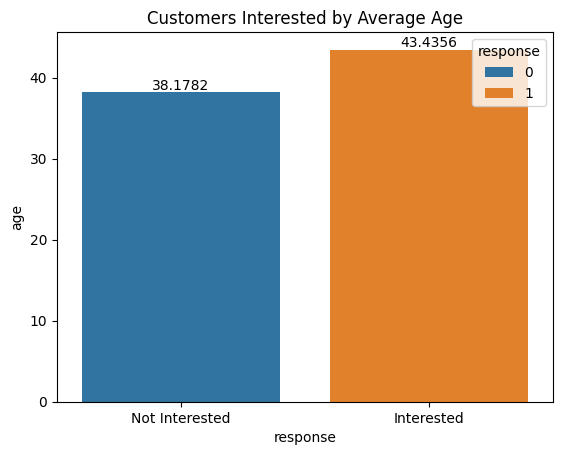

In [148]:
# Visualize
ax = sns.barplot(data=df,x='response', y='age', hue='response', errorbar=None)
plt.xlabel('response')
plt.ylabel('age')
labels = ['Not Interested','Interested']
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(labels)
plt.title('Customers Interested by Average Age')
plt.show()

So customers who are interested in our insurance are on average 43 years old. Maybe customers at that age who have thought about the long-term damage to their vehicles so they choose to insure their vehicles.

## 4.3 Kategorikal

### 4.2.1 Ordinal

#### 4.2.1.1 Vehicle Age

This column contains information on the age of the vehicles owned by customers. Let's look at the data distribution first.

In [149]:
# Count column vehicle_age
veh_age = df['vehicle_age'].value_counts().to_frame(name='count')
veh_age['percentage'] = df['vehicle_age'].value_counts(normalize=True)
veh_age.reset_index(inplace=True)
veh_age


,index,count,percentage
0,1-2 Year,200316,0.525613
1,< 1 Year,164786,0.432385
2,> 2 Years,16007,0.042001


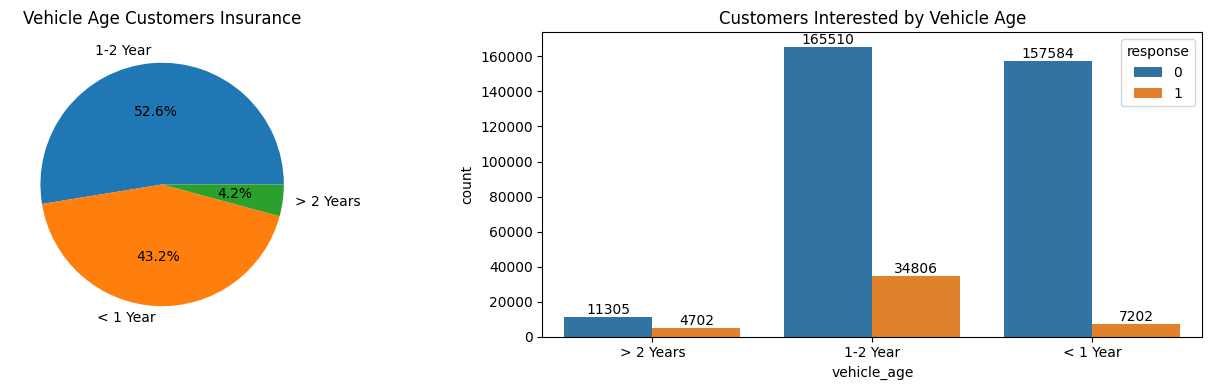

In [150]:
# Visualization
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('Vehicle Age Customers Insurance')
plt.pie(veh_age["percentage"], labels=veh_age['index'], autopct='%.01f%%')

# Barplot
plt.subplot(1,2,2)
plt.title('Customers Interested by Vehicle Age')
ax = sns.countplot(data=df, x='vehicle_age', hue='response')
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.show()

We can see from the data displayed, the most customers are dominated by 1-2 year old vehicles with a percentage of 52.6% and customers who are interested in our insurance also have the most vehicles with 1-2 year old vehicles with a total of 34,806 people.

#### 4.2.1.2 Region Code Category

This column contains region code information that we have categorized into region codes with a chance of being interested in insurance from small chance, medium chance to high chance. Let's see the data division

In [151]:
# Count column reg_code_cat
rg_code = df['reg_code_cat'].value_counts().to_frame(name='count')
rg_code['percentage'] = df['reg_code_cat'].value_counts(normalize=True)
rg_code.reset_index(inplace=True)
rg_code

,index,count,percentage
0,medium chance,263878,0.692395
1,high chance,113920,0.298917
2,small chance,3311,0.008688


if we visualize:

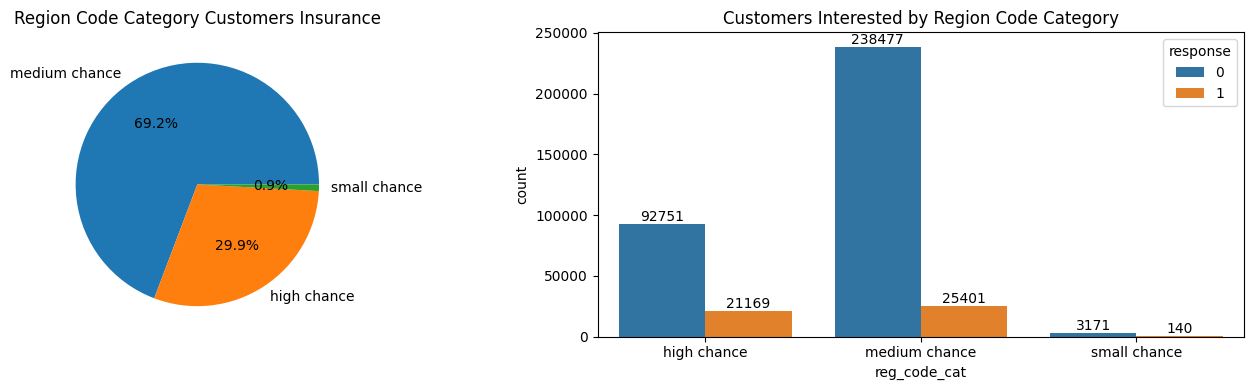

In [152]:
# Visualization
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('Region Code Category Customers Insurance')
plt.pie(rg_code["percentage"], labels=rg_code['index'], autopct='%.01f%%')

# Barplot
plt.subplot(1,2,2)
plt.title('Customers Interested by Region Code Category')
ax = sns.countplot(data=df, x='reg_code_cat', hue='response')
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.show()

If we look at our customers based on the region code, it is dominated by medium chance interest with a percentage of 69.2% and if we look at the target column, customers categorized with medium chance have more numbers who are really interested in our insurance with a total of 25,401 people.

#### 4.2.1.3 Policy Sales Chanel Category

This column contains policy channel information that we have categorized into policy channels with the chance of being interested in insurance from small chance, medium chance to high chance. Let's take a look at the data distribution

In [153]:
# Count column policy_sales_channel_cat
pol_chn_cat = df['policy_sales_channel_cat'].value_counts().to_frame(name='count')
pol_chn_cat['percentage'] = df['policy_sales_channel_cat'].value_counts(normalize=True)
pol_chn_cat.reset_index(inplace=True)
pol_chn_cat

,index,count,percentage
0,small chance,350700,0.920209
1,medium chance,30407,0.079786
2,high chance,2,0.000005


if we visualize

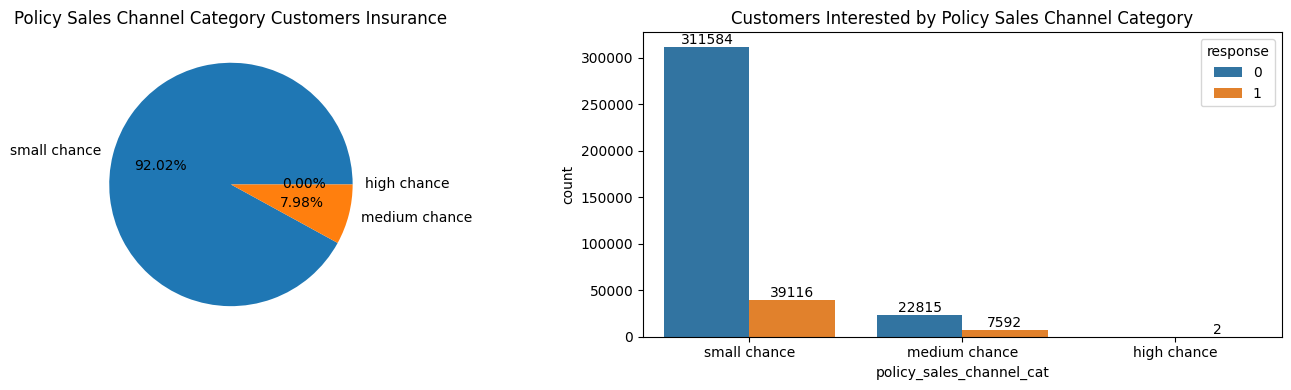

In [154]:
# Visualization
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('Policy Sales Channel Category Customers Insurance')
plt.pie(pol_chn_cat["percentage"], labels=pol_chn_cat['index'], autopct='%.02f%%')

# Barplot
plt.subplot(1,2,2)
plt.title('Customers Interested by Policy Sales Channel Category')
ax = sns.countplot(data=df, x='policy_sales_channel_cat', hue='response')
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.show()

If we look based on the policy sales channel, it turns out that many customers are categorized as small chance with a percentage of 92%. When associated with the target column, customers who are interested in our vehicle insurance are also mostly in the small chance category with a total of 39,116 people. This means that it is possible that even though customers have a small chance category, they are actually interested in our vehicle insurance.

#### 4.2.1.4 Age Category

This column contains information on the age of customers that we have categorized into:
- Young adult (18-25 age)
- Adult (26-44 age)
- Middle-age (45-59 age)
- Old age (>60 age)

In [155]:
# Count column age_cat
age_cat = df['age_cat'].value_counts().to_frame(name='count')
age_cat['percentage'] = df['age_cat'].value_counts(normalize=True)
age_cat.reset_index(inplace=True)
age_cat

,index,count,percentage
0,adult,134656,0.353327
1,young adult,114505,0.300452
2,middle old,85175,0.223492
3,old,46773,0.122729


If we visualize it and connect it with the target column:

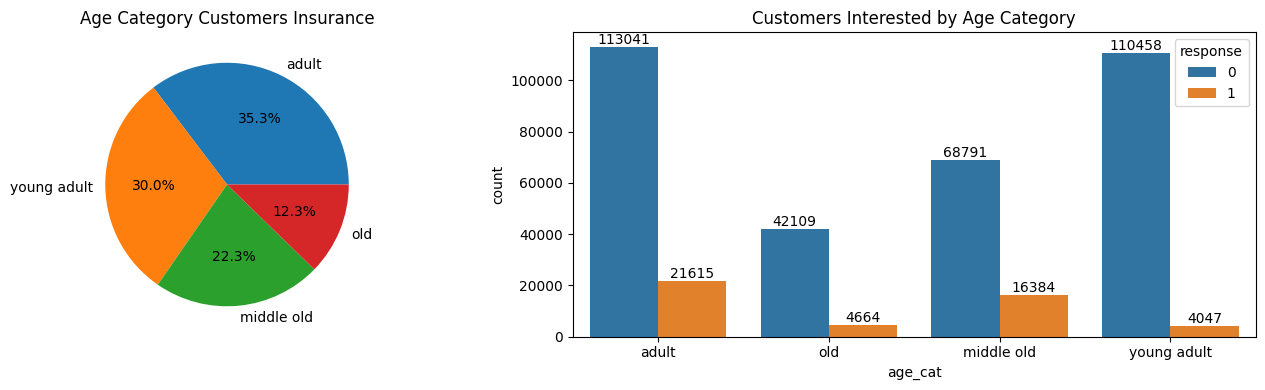

In [156]:
# Visualization
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('Age Category Customers Insurance')
plt.pie(age_cat["percentage"], labels=age_cat['index'], autopct='%.01f%%')

# Barplot
plt.subplot(1,2,2)
plt.title('Customers Interested by Age Category')
ax = sns.countplot(data=df, x='age_cat', hue='response')
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.show()

If we look at the overall data, our customers are dominated by the adult age category (26-44 years old) with a percentage of 35.3%. If we connect it with the target column, then customers who are interested in our vehicle insurance are also dominated by the adult age category with a total of 21615 people.

### 4.2.2 Nominal

#### 4.2.2.1 Gender

This column contains gender information of customers

In [157]:
# Count column gender
gen = df['gender'].value_counts().to_frame(name='count')
gen['percentage'] = df['gender'].value_counts(normalize=True)
gen.reset_index(inplace=True)
gen


,index,count,percentage
0,Male,206089,0.540761
1,Female,175020,0.459239


If we look at our gender customers, there are more men than women. Let's see what gender of customers are interested in?

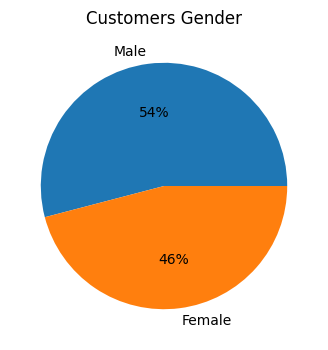

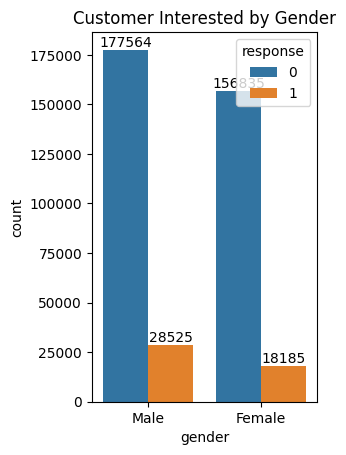

In [158]:
# Visualization
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('Customers Gender')
plt.pie(gen["percentage"], labels = gen["index"], autopct='%.0f%%')
plt.show()

# Barplot
plt.subplot(1,2,2)
plt.title('Customer Interested by Gender')
ax = sns.countplot(data=df, x='gender', hue='response')
for i in ax.containers:
    ax.bar_label(i,)

The gender of customers interested in our insurance is predominantly Male with 28,525 people.

#### 4.2.2.2 Region Code

This column contains the unique code information for the region customers. Let's check the unique value.

In [159]:
# Cek unique value
df['region_code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

Because this column has many unique values, we will categorize the load data. Let's see the data distribution

In [160]:
# Count column policy_sales_channel
pols_ch = df['region_code'].value_counts().to_frame(name='count')
pols_ch['percentage'] = df['region_code'].value_counts(normalize=True)
pols_ch.reset_index(inplace=True)
pols_ch

,index,count,percentage
0,28.0,106415,0.279225
1,8.0,33877,0.088891
2,46.0,19749,0.051820
3,41.0,18263,0.047921
4,15.0,13308,0.034919
5,30.0,12191,0.031988
6,29.0,11065,0.029034
7,50.0,10243,0.026877
8,3.0,9251,0.024274
9,11.0,9232,0.024224


if we visalize:

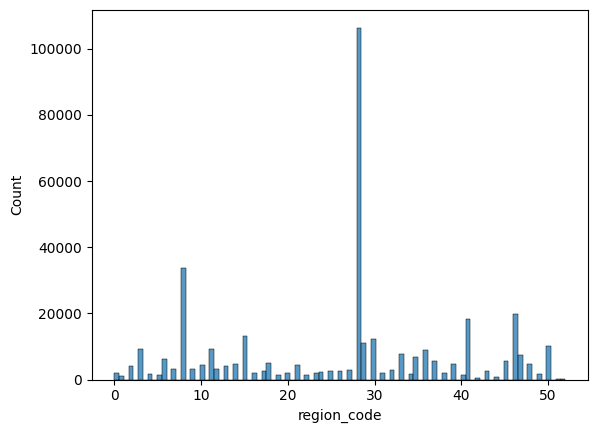

In [161]:
# Visualization
sns.histplot(df['region_code']);

As shown, customers come from 52 different regions with the most origin in the region with code 28 with a total of 106415 customers. Let's see which region code has the highest number of insurance enthusiasts?

In [162]:
reg_code_1 = df[df['response']==1]
reg_code_1['region_code'].value_counts().reset_index()

,index,region_code
0,28.0,19917
1,8.0,3257
2,41.0,2224
3,46.0,2032
4,29.0,1365
5,3.0,1181
6,11.0,1041
7,15.0,958
8,30.0,900
9,35.0,865


If we visualize:

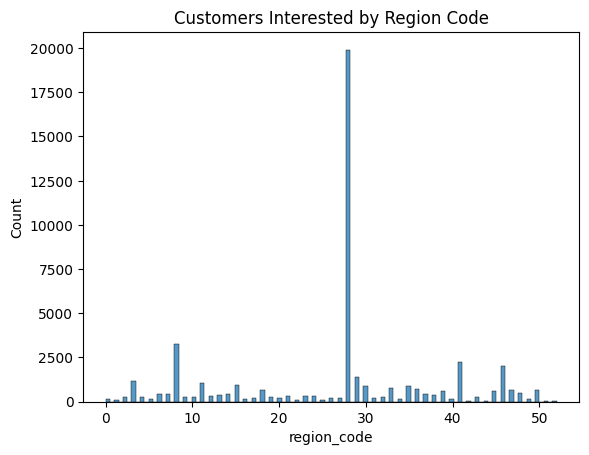

In [163]:
# Visualization
plt.title('Customers Interested by Region Code')
sns.histplot(reg_code_1['region_code']);
plt.show()

We can see that customers who are interested in our insurance are mostly from regions that have code 28 with a total of 19,917 people.

#### 4.2.2.3 Driving License

This column contains information on customers who have and have not had a driving license. Let's take a look at the data division first

In [164]:
# Count column driving_license
driv_l = df['driving_license'].value_counts().to_frame(name='count')
driv_l['percentage'] = df['driving_license'].value_counts(normalize=True)
driv_l.reset_index(inplace=True)
driv_l

,index,count,percentage
0,1,380297,0.997869
1,0,812,0.002131


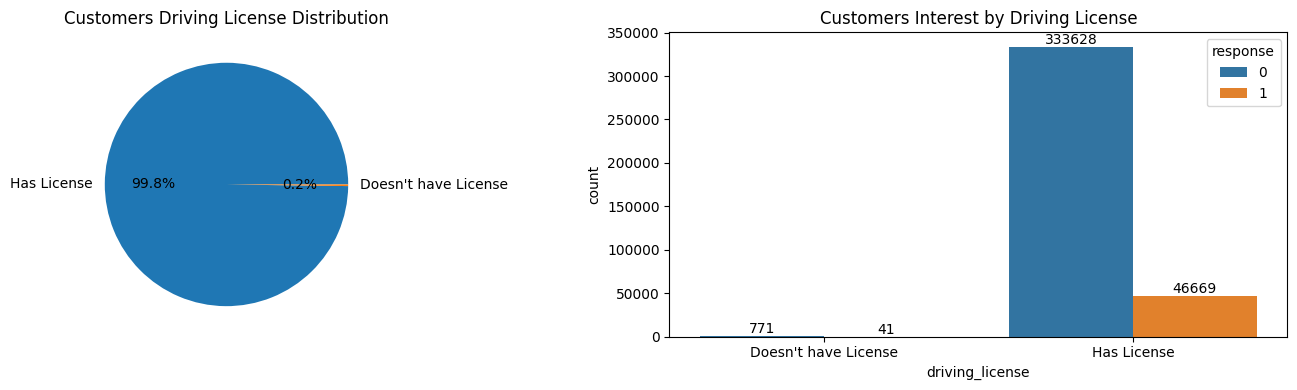

In [165]:
# Visualization
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('Customers Driving License Distribution')
labels = ['Has License',"Doesn't have License"]
plt.pie(driv_l["percentage"], labels = labels, autopct='%.01f%%')

# Barplot
plt.subplot(1,2,2)
plt.title('Customers Interest by Driving License')
ax = sns.countplot(data=df, x='driving_license', hue='response')
for i in ax.containers:
    ax.bar_label(i,)
labels = ["Doesn't have License",'Has License']
ax.set_xticklabels(labels)
plt.tight_layout()
plt.show()

We can see, from the whole data, only 0.2% of customers do not have a driving license. Customers who are interested in insurance are dominated by customers who have a license with a total of 46,669 people and 41 people who are interested in insurance but do not have a driving license.

#### 4.2.2.4 Previously Insured

This column contains information on customers who have or have not had vehicle insurance. Let's take a look at the data:

In [166]:
# Count column previously_insured
prev_ins = df['previously_insured'].value_counts().to_frame(name='count')
prev_ins['percentage'] = df['previously_insured'].value_counts(normalize=True)
prev_ins.reset_index(inplace=True)
prev_ins

,index,count,percentage
0,0,206481,0.54179
1,1,174628,0.45821


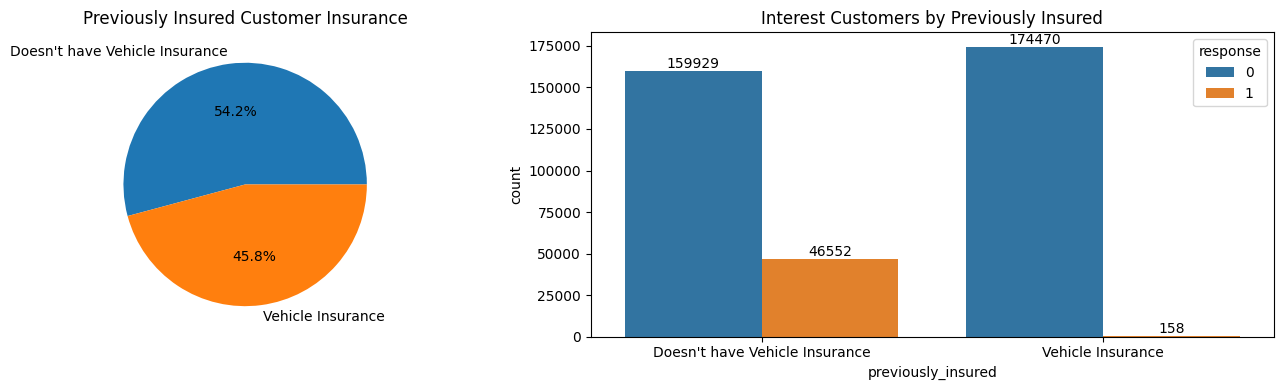

In [167]:
# Visualization
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('Previously Insured Customer Insurance')
labels = ["Doesn't have Vehicle Insurance",'Vehicle Insurance']
plt.pie(prev_ins["percentage"], labels = labels, autopct='%.01f%%')

# Barplot
plt.subplot(1,2,2)
plt.title('Interest Customers by Previously Insured')
ax = sns.countplot(data=df, x='previously_insured', hue='response')
for i in ax.containers:
    ax.bar_label(i,)
labels = ["Doesn't have Vehicle Insurance",'Vehicle Insurance']
ax.set_xticklabels(labels)
plt.tight_layout()
plt.show()

From the data displayed, we can see that the majority of customers do not have vehicle insurance with a percentage of 54.2% with a total of 206,481.
Customers who are interested in our insurance come from the category that does not have vehicle insurance with a total of 46552 customers and only 158 customers who are interested in our insurance and already have vehicle insurance.

#### 4.2.2.5 Vehicle Damage

This column contains information on whether the customer's vehicle has been damaged in the past. Let's take a look at the data division

In [168]:
# Count column vehicle_damage
vehic_dmg = df['vehicle_damage'].value_counts().to_frame(name='count')
vehic_dmg['percentage'] = df['vehicle_damage'].value_counts(normalize=True)
vehic_dmg.reset_index(inplace=True)
vehic_dmg

,index,count,percentage
0,Yes,192413,0.504877
1,No,188696,0.495123


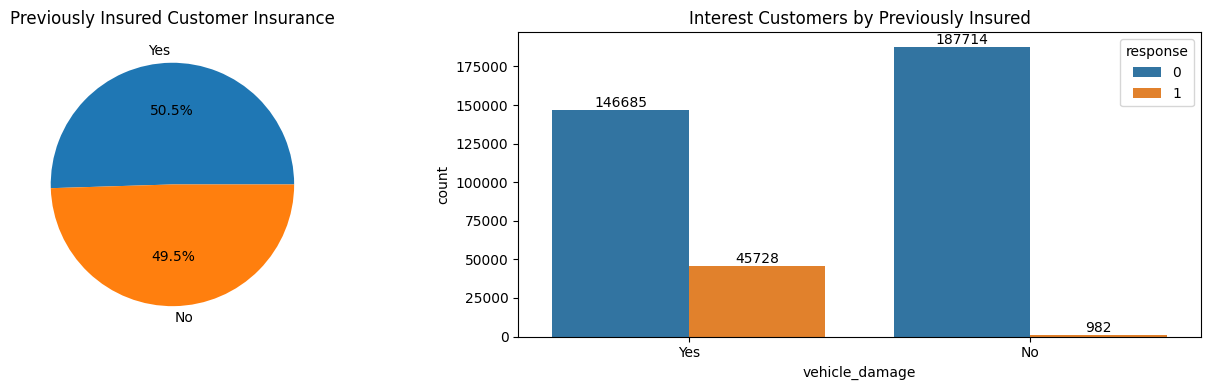

In [169]:
# Visualization
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('Previously Insured Customer Insurance')
labels = ["Yes",'No']
plt.pie(vehic_dmg["percentage"], labels = labels, autopct='%.01f%%')

# Barplot
plt.subplot(1,2,2)
plt.title('Interest Customers by Previously Insured')
ax = sns.countplot(data=df, x='vehicle_damage', hue='response')
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.show()

It can be seen that customers are dominated by customers who have vehicles that have been damaged with a percentage of `50.5%`. When viewed from the customer interest, it is also dominated by customers who have vehicles that have been damaged.

#### 4.2.2.6 Policy_Sales_Channel

This column contains information about the Anonymized Code for the channel of outreaching to the customer. Let's look at the data distribution first:

In [170]:
# Count column policy_sales_channel
pols_ch = df['policy_sales_channel'].value_counts().to_frame(name='count')
pols_ch['percentage'] = df['policy_sales_channel'].value_counts(normalize=True)
pols_ch.reset_index(inplace=True)
pols_ch

,index,count,percentage
0,152.0,134784,0.353663
1,26.0,79700,0.209127
2,124.0,73995,0.194157
3,160.0,21779,0.057146
4,156.0,10661,0.027974
...,...,...,...
150,149.0,1,0.000003
151,43.0,1,0.000003
152,144.0,1,0.000003
153,143.0,1,0.000003


If we visualize:

Text(0.5, 1.0, 'Policy Sales Channel Distribution')

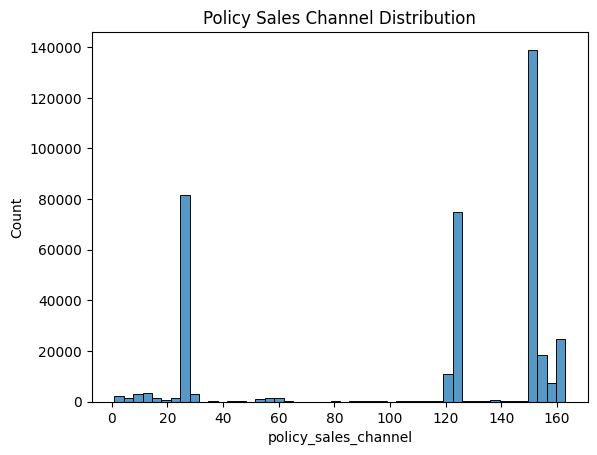

In [171]:
sns.histplot(df['policy_sales_channel']);
plt.title('Policy Sales Channel Distribution')

From the data and visualizations displayed, we can see that the most policy channels come from code 152 with a percentage of 35% of the overall data. Then let's see which policy channel attracts the most customers who are interested in our insurance.

In [172]:
df.groupby('policy_sales_channel').mean()['response'].sort_values(ascending=False)

policy_sales_channel
123.0    1.000000
43.0     1.000000
27.0     0.333333
28.0     0.333333
36.0     0.326923
           ...   
112.0    0.000000
99.0     0.000000
137.0    0.000000
50.0     0.000000
84.0     0.000000
Name: response, Length: 155, dtype: float64

It turns out that customers who are interested in our insurance come from policy channels with codes 123 and 43.

# 5. Feature Engineering

## 5.1 Feature Selection

In [173]:
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,reg_code_cat,policy_sales_channel_cat,age_cat
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,high chance,small chance,adult
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,medium chance,small chance,old
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,high chance,small chance,middle old
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,medium chance,small chance,young adult
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,medium chance,small chance,adult


In [174]:
df.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response', 'reg_code_cat',
       'policy_sales_channel_cat', 'age_cat'],
      dtype='object')

From the EDA results that have been carried out, the columns that have a correlation with the target column are:
- Target Column: `response`
- Numeric Column: `'annual_premium', 'vintage'`
- Categorical Ordinal columns: `'vehicle_age', 'reg_code_cat', 'policy_sales_channel_cat', 'age_cat'`
- Nominal Categorical Columns: `'gender', 'driving_license', 'previously_insured', 'vehicle_damage'`

All the columns I chose because they have a relationship with the target column that has been proven in EDA. The column that is not used is id because it only states the customer id, and the age, policy_sales, and region code columns because they have been categorized in new columns.

In [175]:
# Split column
target = ['response']
num_cols = ['annual_premium', 'vintage']
cato_cols = ['vehicle_age', 'reg_code_cat', 'policy_sales_channel_cat', 'age_cat']
catn_cols = ['gender',  'driving_license',  'previously_insured', 'vehicle_damage']

In [176]:
# Merge columns
dfm = df[num_cols+cato_cols+catn_cols+target]
dfm.head()

,annual_premium,vintage,vehicle_age,reg_code_cat,policy_sales_channel_cat,age_cat,gender,driving_license,previously_insured,vehicle_damage,response
0,40454.0,217,> 2 Years,high chance,small chance,adult,Male,1,0,Yes,1
1,33536.0,183,1-2 Year,medium chance,small chance,old,Male,1,0,No,0
2,38294.0,27,> 2 Years,high chance,small chance,middle old,Male,1,0,Yes,1
3,28619.0,203,< 1 Year,medium chance,small chance,young adult,Male,1,1,No,0
4,27496.0,39,< 1 Year,medium chance,small chance,adult,Female,1,1,No,0


In [177]:
print('Dataframe Shape before Selection: ', df.shape)
print('Dataframe Shape after Selection: ', dfm.shape)

Dataframe Shape before Selection:  (381109, 15)
Dataframe Shape after Selection:  (381109, 11)


## 5.2 Split Features and Target

We will split the features column and the target column:

In [178]:
X = dfm.drop('response', axis=1)
y = dfm['response']

After we split into X and y, we will split the data into train data and test data.

## 5.3 Split Train and Test

Split dataset to train set and test set

In [179]:
# Split Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=6)

# shape train dan test
print('Train Size:', X_train.shape)
print('Test Size:', X_test.shape)

Train Size: (304887, 10)
Test Size: (76222, 10)


## 5.3 Handling Outliers

The analysis result in EDA has outliers in the selected column. Before handling we first check the skew:

In [180]:
# Fungsi untuk mencari outlier, Jika skew normal menggunakan Z-Score, dan skew dengan Tukey's Rule
kolom_normal = []
kolom_skew = []

def outliers(df, kolom):
    a = df[kolom].skew()
    if a > 0.5 or a < -0.5:
        IQR = df[kolom].quantile(0.75) - df[kolom].quantile(0.25)
        Upbond = df[kolom].quantile(0.75) + (IQR * 3)
        Lowbond = df[kolom].quantile(0.75) - (IQR * 3)
        Persen = len(df[(df[kolom] > Upbond) | (df[kolom] < Lowbond)])/len(df)*100
        kolom_skew.append((kolom,a))
        print(f"\nNilai Distribusi Kolom {kolom} SKEW : {a:.2f} \nPersentase Outliers: {Persen:.2f}")
    else:
        lowbond = df[kolom].mean() - 3 * df[kolom].std()
        upbond = df[kolom].mean() + 3 * df[kolom].std()
        persen = len(df[(df[kolom] > upbond) | (df[kolom] < lowbond)])/len(df)*100
        kolom_normal.append((kolom,a))
        print(f"\nNilai Distribusi Kolom {kolom} NORMAL : {a:.2f} \nPersentase Outliers: {persen:.2f}")

for x in X_train[num_cols]:
    outliers(X_train, x)


Nilai Distribusi Kolom annual_premium SKEW : 1.65 
Persentase Outliers: 0.47

Nilai Distribusi Kolom vintage NORMAL : 0.00 
Persentase Outliers: 0.00


Let's first check how the outliers look like

In [181]:
# Looking for Upbond & Lowbond Value
q1 = dfm['annual_premium'].quantile(0.25)
q3 = dfm['annual_premium'].quantile(0.75)
iqr = q3-q1
upbon = q3 + 3*iqr
lowbon = q1 - 3*iqr

# Show ouliers data
out_annual_premium = dfm[(dfm['annual_premium'] > upbon) | (dfm['annual_premium']<lowbon)]
out_annual_premium

,annual_premium,vintage,vehicle_age,reg_code_cat,policy_sales_channel_cat,age_cat,gender,driving_license,previously_insured,vehicle_damage,response
167,89282.0,101,< 1 Year,medium chance,small chance,adult,Female,1,0,Yes,0
176,101021.0,49,< 1 Year,high chance,small chance,young adult,Male,1,1,No,0
401,90789.0,186,1-2 Year,high chance,small chance,old,Male,1,0,Yes,1
429,119735.0,295,1-2 Year,high chance,small chance,adult,Female,1,0,Yes,0
480,104002.0,132,> 2 Years,medium chance,medium chance,old,Male,1,0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
379812,93221.0,279,1-2 Year,high chance,small chance,middle old,Male,1,1,No,0
380119,92283.0,15,< 1 Year,high chance,small chance,young adult,Female,1,1,No,0
380313,95453.0,62,1-2 Year,high chance,small chance,middle old,Female,1,0,Yes,0
380815,91305.0,183,< 1 Year,high chance,small chance,adult,Female,1,1,No,0


After we checked and from my personal judgment, the outliers value is still natural so I decided not to handle the outliers.

## 5.5 Handling Missing Value

Let's check the missing values in the train and test sets.

In [182]:
# Cek missing value pada x train
X_train.isnull().sum()

annual_premium              0
vintage                     0
vehicle_age                 0
reg_code_cat                0
policy_sales_channel_cat    0
age_cat                     0
gender                      0
driving_license             0
previously_insured          0
vehicle_damage              0
dtype: int64

In [183]:
# Cek missing value pada x test
X_test.isnull().sum()

annual_premium              0
vintage                     0
vehicle_age                 0
reg_code_cat                0
policy_sales_channel_cat    0
age_cat                     0
gender                      0
driving_license             0
previously_insured          0
vehicle_damage              0
dtype: int64

In [184]:
# Cek missing value pada y train
y_train.isnull().sum()

0

In [185]:
# Cek missing value pada y test
y_test.isnull().sum()

0

After checking, it is proven that there are no missing values so there is no need for handling.

## 5.6 Split Numerical and Categorical Column

Before scaling and encoding, we will split the train set and test set data into the appropriate column categories. We first check whether the data distribution is skew or not.

In [186]:
for x in X_train[num_cols]:
    outliers(X_train, x)


Nilai Distribusi Kolom annual_premium SKEW : 1.65 
Persentase Outliers: 0.47

Nilai Distribusi Kolom vintage NORMAL : 0.00 
Persentase Outliers: 0.00


Because there is data that has both skew and normal, we will split it into skew column and normal column.

In [187]:
num_cols_s = [x[0] for x in kolom_skew]
num_cols_n = [x[0] for x in kolom_normal]

print('Kolom Normal:\n',num_cols_n)
print('Kolom Skew:\n',num_cols_s)

Kolom Normal:
 ['vintage', 'vintage']
Kolom Skew:
 ['annual_premium', 'annual_premium']


## 5.7 Imbalance Handling

Because the division of the target is 88% and 12%, imbalanced handling will be carried out with the undersampling method and data reduction because we have a very large data of 300,000 data.

In [188]:
# Reduce Train Set
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train,y_train,test_size= 0.10, random_state=6)

# Shape train set before and after reducing
print('Train Size Before Reduce:', X_train.shape)
print('Train Size After Reduce:', X_test_1.shape)

Train Size Before Reduce: (304887, 10)
Train Size After Reduce: (30489, 10)


If we split the data with the undersampling method

In [189]:
# Split Train data with undersampling method
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_test_1, y_test_1)

# Banyaknya data train dan test
print('Train Size Before Undersampling:', X_train.shape)
print('Train Size After Undersampling:', X_resampled.shape)

Train Size Before Undersampling: (304887, 10)
Train Size After Undersampling: (7282, 10)


Because we have tried the test set without being reduced to produce overfit results because in the train we have reduced the data and handled imbalanced data. So in the test set we will reduce and handle imbalanced data, so we will compare the test data before handling and after handling imbalanced.

In [190]:
# Reduce Test Set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_test,y_test,test_size= 0.10, random_state=6)

# Shape train
print('Test Size Before Reduce:', X_test.shape)
print('Test Size After Reduce:', X_test_2.shape)

# Split data with undersampling method
rus = RandomUnderSampler(random_state=0)
X_test2, y_test2 = rus.fit_resample(X_test_2, y_test_2)

# Shape test2
print('Test Size Before Undersampling:', X_test.shape)
print('Test Size After Undersampling:', X_test2.shape)

Test Size Before Reduce: (76222, 10)
Test Size After Reduce: (7623, 10)
Test Size Before Undersampling: (76222, 10)
Test Size After Undersampling: (1798, 10)


If we visualise

Text(0.5, 1.0, 'Test Set Before Under sampling')

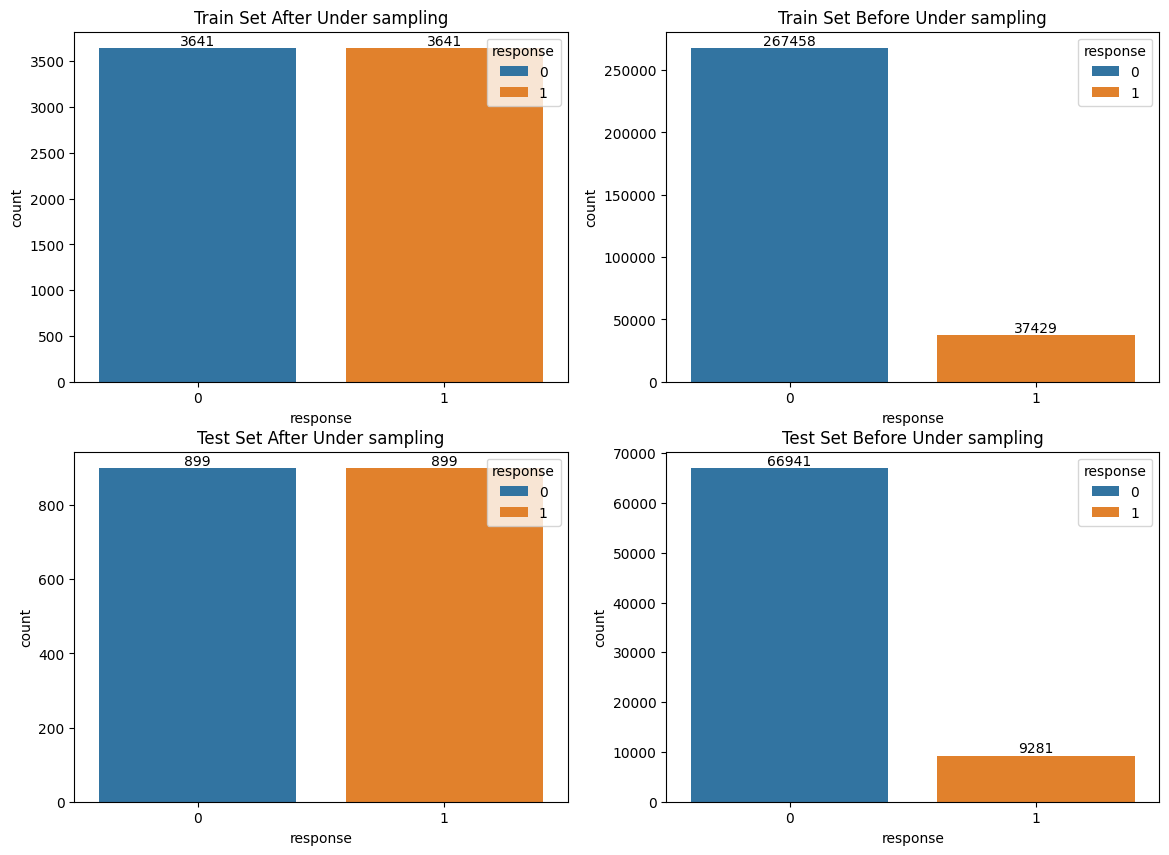

In [191]:
# Visualize
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(14, 10))
axx = sns.countplot(x=y_resampled, hue=y_resampled, ax=ax[0,0]);
for i in axx.containers:
    axx.bar_label(i,)
axx.set_title('Train Set After Under sampling')

axx = sns.countplot(x=y_train, hue=y_train, ax=ax[0,1]);
for i in axx.containers:
    axx.bar_label(i,)
axx.set_title('Train Set Before Under sampling')

axx = sns.countplot(x=y_test2, hue=y_test2, ax=ax[1,0]);
for i in axx.containers:
    axx.bar_label(i,)
axx.set_title('Test Set After Under sampling')

axx = sns.countplot(x=y_test, hue=y_test, ax=ax[1,1]);
for i in axx.containers:
    axx.bar_label(i,)
axx.set_title('Test Set Before Under sampling')

Data successfully undersampled

## 5.7 Pipeline Prepocessor

We will create a preprocessor pipeline to prevent data leakage. The content of the pipeline is scaling, then PCA is performed by maintaining 95% data and categorical data is encoded with one hot encoder.

In [192]:
# Fitur Scaling (All Column Skew)
numeric_transformer_1 = Pipeline([
    ('scaler_s', MinMaxScaler())
])

# Fitur Scaling (All Column Normal)
numeric_transformer_2 = Pipeline([
    ('scaler_n', StandardScaler())
])

# Fitur Encode Nominal
categorical_transformer_1 = Pipeline([
    ('encoder_n', OneHotEncoder())
])

# Fitur Encode Ordinal
categorical_transformer_2 = Pipeline([
    ('encoder_o', OrdinalEncoder(categories=[['< 1 Year', '1-2 Year', '> 2 Years'],
                                             ['small chance', 'medium chance', 'high chance'],
                                             ['small chance', 'medium chance', 'high chance'],
                                             ['young adult', 'adult', 'middle old', 'old']]))
])

# define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_s', numeric_transformer_1, num_cols_s),
    ('num_n', numeric_transformer_1, num_cols_n),
    ('cat_n', categorical_transformer_1, catn_cols),
    ('cat_o', categorical_transformer_2, cato_cols)
])

# 6. Model Definition

Use the model with default parameters to find the best model for hyper parameter tuning.

## 6.1 Support Vector Machine (SVM)

In [193]:
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(probability=True))
])

## 6.2 K-Nearest Neighbors (KNN)

In [194]:
pipe_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

## 6.3 Decision Tree

In [195]:
pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())
])

## 6.4 Random Forest

In [196]:
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier())
])

## 6.5 Boosting

In [197]:
pipe_xg = Pipeline([
    ('preprocessor', preprocessor),
    ('xgboost', XGBClassifier())
])

# 7. Model Training

## 7.1 Support Vector Machine (SVM)

In [198]:
%%time
awl_train_svc = time.time()
pipe_svc.fit(X_resampled, y_resampled)
waktu_train_svc = time.time() - awl_train_svc

CPU times: user 11.3 s, sys: 31.5 ms, total: 11.4 s
Wall time: 11.8 s


## 7.2 K-Nearest Neighbors (KNN)

In [199]:
%%time
awl_train_knn = time.time()
pipe_knn.fit(X_resampled, y_resampled)
waktu_train_knn = time.time() - awl_train_knn

CPU times: user 30.5 ms, sys: 0 ns, total: 30.5 ms
Wall time: 31.1 ms


## 7.3 Decision Tree

In [200]:
%%time
awl_train_dt = time.time()
pipe_dt.fit(X_resampled, y_resampled)
waktu_train_dt = time.time() - awl_train_dt

CPU times: user 78.8 ms, sys: 0 ns, total: 78.8 ms
Wall time: 79.7 ms


## 7.4 Random Forest

In [201]:
%%time
awl_train_rf = time.time()
pipe_rf.fit(X_resampled, y_resampled)
waktu_train_rf = time.time() - awl_train_rf

CPU times: user 1.11 s, sys: 2.03 ms, total: 1.11 s
Wall time: 1.11 s


## 7.5 Boosting

In [202]:
%%time
awl_train_xg = time.time()
pipe_xg.fit(X_resampled, y_resampled)
waktu_train_xg = time.time() - awl_train_xg

CPU times: user 339 ms, sys: 970 µs, total: 340 ms
Wall time: 188 ms


# 8. Model Evaluation

Evaluate the model that has been trained using cross validation (precision), precision score and confusion matrix with the main goal of finding a model that has the best precision results. Because the purpose of this model is to find a model that has the highest `True Positive Rate`. Because according to my personal judgment, a high false positive rate will result in a prediction error causing a fatal targeting error for insurance customers. For example if we predict that there are 100 customers, but in reality only 20 people are interested. Then the company budget planning made to attract customer interest in vihicle insurance from the model we have can fail.

## 8.1 Support Vector Machine (SVM)

We will do predictions on the svc model, we do predictions with our x_resampled, x_test and x_test2 data:

In [203]:
%%time
awl_test_svc = time.time()
y_pred_train_svc = pipe_svc.predict(X_resampled)
y_pred_test_svc = pipe_svc.predict(X_test)
y_pred_test2_svc = pipe_svc.predict(X_test2)
waktu_test_svc = time.time() - awl_test_svc

CPU times: user 17.7 s, sys: 45 ms, total: 17.7 s
Wall time: 17.7 s


Then we try to see the value of the evaluation metrics, namely the precision score on the three predictions

In [204]:
# Model Evaluation - Precision Score
print('Precision Score - Train Set : ', precision_score(y_resampled, y_pred_train_svc))
print('Precision Score - Test Set : ', precision_score(y_test, y_pred_test_svc))
print('Precision Score - Test Set Resampled : ', precision_score(y_test2, y_pred_test2_svc))

Precision Score - Train Set :  0.7355064537300372
Precision Score - Test Set :  0.2762234369440761
Precision Score - Test Set Resampled :  0.7280858676207513


Let's visualize the confusion metrics of the three predictions

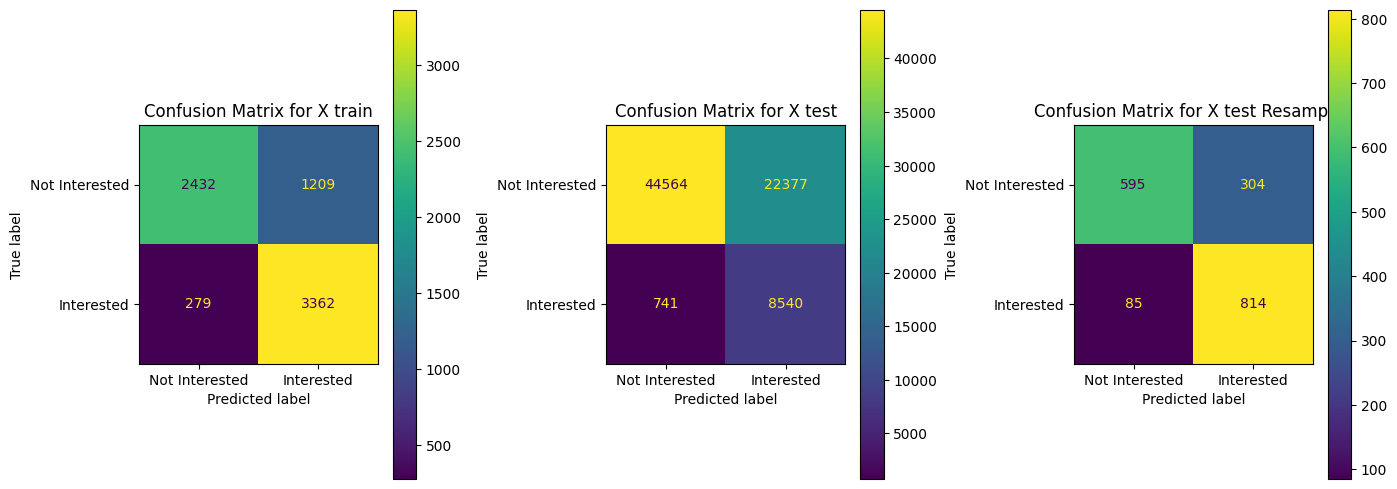

In [205]:
# Visualize Confusion Metrics
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# Confusion Metrics for X train
cm_train = confusion_matrix(y_resampled, y_pred_train_svc)
ConfusionMatrixDisplay(cm_train, display_labels=['Not Interested', 'Interested']).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix for X train')

# Confusion Metrics for X test
cm_test = confusion_matrix(y_test, y_pred_test_svc)
ConfusionMatrixDisplay(cm_test, display_labels=['Not Interested', 'Interested']).plot(ax=ax[1])
ax[1].set_title('Confusion Matrix for X test')

# Confusion Metrics X test Resampled
cm_test_resampled = confusion_matrix(y_test2, y_pred_test2_svc)
ConfusionMatrixDisplay(cm_test_resampled, display_labels=['Not Interested', 'Interested']).plot(ax=ax[2])
ax[2].set_title('Confusion Matrix for X test Resampled')

plt.tight_layout()
plt.show()

Don't forget to also calculate the cross validation value of the train set as the average cross validation value of the train can provide a more realistic estimate of how the model will perform on new data. The average cross validation value of the train also helps detect overfitting.

In [206]:
precision_train_cross_val_svc = cross_val_score(pipe_svc,
                                     X_resampled, y_resampled,
                                     cv=3,
                                     scoring="precision")

print('Precision Score - All - Cross Validation SVC    : ', precision_train_cross_val_svc)
print('Precision Score - Mean - Cross Validation SVC   : ', precision_train_cross_val_svc.mean())
print('Precision Score - Std - Cross Validation SVC    : ', precision_train_cross_val_svc.std())
print('Precision Score - Range of Test-Set SVC         : ', (precision_train_cross_val_svc.mean()-precision_train_cross_val_svc.std()) , '-', (precision_train_cross_val_svc.mean()+precision_train_cross_val_svc.std()))

Precision Score - All - Cross Validation SVC    :  [0.73774834 0.74470899 0.72258065]
Precision Score - Mean - Cross Validation SVC   :  0.7350126614137152
Precision Score - Std - Cross Validation SVC    :  0.00923864832674347
Precision Score - Range of Test-Set SVC         :  0.7257740130869718 - 0.7442513097404587


We then save the evaluation results to the data frame:

In [207]:
# Create a function to calculate the evaluation results
result = {}
metrics = ['Precision Score - Train','Precision Score - Test','Precision Score - Test Resampled','Mean Cross Validation - Train','Time - Train','Time - Predict']

model_svc = {
    'Precision Score - Train': precision_score(y_resampled, y_pred_train_svc),
    'Precision Score - Test': precision_score(y_test, y_pred_test_svc),
    'Precision Score - Test Resampled': precision_score(y_test2, y_pred_test2_svc),
    'Mean Cross Validation - Train' : precision_train_cross_val_svc.mean(),
    'Time - Train' : waktu_train_svc,
    'Time - Predict' : waktu_test_svc
}

# Save into dictionary
result['Model SVC'] = model_svc
df_result = pd.DataFrame(result,index=metrics)
df_result

,Model SVC
Precision Score - Train,0.735506
Precision Score - Test,0.276223
Precision Score - Test Resampled,0.728086
Mean Cross Validation - Train,0.735013
Time - Train,11.804242
Time - Predict,17.743236


If we look at the evaluation metrics of the SVC base line, we can see a big difference in the precision score on the test set that has not been undersampled with the test set that has been undersampled. Precision score on the train 75% while on the resampled test 72% indicates that the SVC model is a good fit model. Evidenced by the mean cross validation which is almost close to the train precision score value of 73%. The training and prediction time is also quite fast. The original test data has a very low value because the amount of original test data is very large compared to the resampled train data, and also the data in the test is very imbalanced. the distribution of data in the test set is very different from the one of the training/validation set. So that is what causes the original test set value to be very bad.

## 8.2 K-Nearest Neighbors (KNN)

We will do predictions on the KNN model, we do predictions with our x_resampled, x_test and x_test2 data:

In [208]:
%%time
awl_test_knn = time.time()
y_pred_train_knn = pipe_knn.predict(X_resampled)
y_pred_test_knn = pipe_knn.predict(X_test)
y_pred_test2_knn = pipe_knn.predict(X_test2)
waktu_test_knn = time.time() - awl_test_knn

CPU times: user 10.8 s, sys: 247 ms, total: 11 s
Wall time: 9.19 s


Then we try to see the value of the evaluation metrics, namely the precision score on the three predictions

In [209]:
# Model Evaluation - Precision Score
print('Precision Score - Train Set : ', precision_score(y_resampled, y_pred_train_knn))
print('Precision Score - Test Set : ', precision_score(y_test, y_pred_test_knn))
print('Precision Score - Test Set Resampled : ', precision_score(y_test2, y_pred_test2_knn))

Precision Score - Train Set :  0.791988416988417
Precision Score - Test Set :  0.2695375358567131
Precision Score - Test Set Resampled :  0.7333994053518335


Let's visualize the confusion metrics of the three predictions

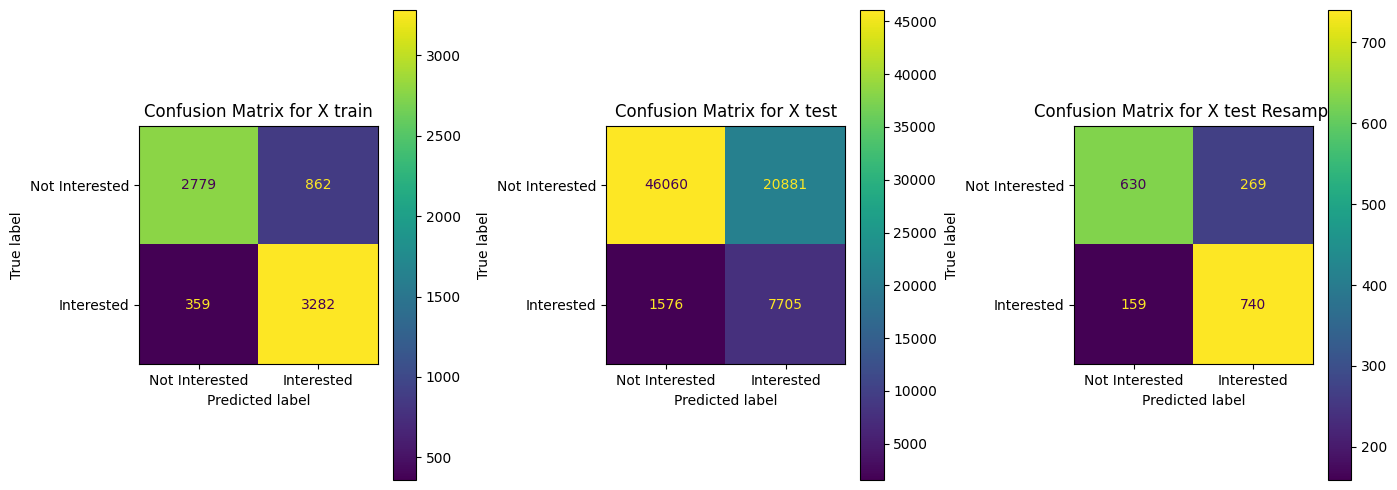

In [210]:
# Visualize Confusion Metrics
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# Confusion Metrics for X train
cm_train = confusion_matrix(y_resampled, y_pred_train_knn)
ConfusionMatrixDisplay(cm_train, display_labels=['Not Interested', 'Interested']).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix for X train')

# Confusion Metrics for X test
cm_test = confusion_matrix(y_test, y_pred_test_knn)
ConfusionMatrixDisplay(cm_test, display_labels=['Not Interested', 'Interested']).plot(ax=ax[1])
ax[1].set_title('Confusion Matrix for X test')

# Confusion Metrics X test Resampled
cm_test_resampled = confusion_matrix(y_test2, y_pred_test2_knn)
ConfusionMatrixDisplay(cm_test_resampled, display_labels=['Not Interested', 'Interested']).plot(ax=ax[2])
ax[2].set_title('Confusion Matrix for X test Resampled')

plt.tight_layout()
plt.show()

Don't forget to also calculate the cross validation value of the train set as the average cross validation value of the train can provide a more realistic estimate of how the model will perform on new data. The average cross validation value of the train also helps detect overfitting.

In [211]:
precision_train_cross_val_knn = cross_val_score(pipe_knn,
                                     X_resampled, y_resampled,
                                     cv=3,
                                     scoring="precision")

print('Precision Score - All - Cross Validation knn    : ', precision_train_cross_val_knn)
print('Precision Score - Mean - Cross Validation knn   : ', precision_train_cross_val_knn.mean())
print('Precision Score - Std - Cross Validation knn    : ', precision_train_cross_val_knn.std())
print('Precision Score - Range of Test-Set knn         : ', (precision_train_cross_val_knn.mean()-precision_train_cross_val_knn.std()) , '-', (precision_train_cross_val_knn.mean()+precision_train_cross_val_knn.std()))

Precision Score - All - Cross Validation knn    :  [0.73239437 0.73347858 0.71043293]
Precision Score - Mean - Cross Validation knn   :  0.7254352913232878
Precision Score - Std - Cross Validation knn    :  0.01061750083527642
Precision Score - Range of Test-Set knn         :  0.7148177904880113 - 0.7360527921585642


We then save the evaluation results to the data frame:

In [212]:
model_knn = {
    'Precision Score - Train': precision_score(y_resampled, y_pred_train_knn),
    'Precision Score - Test': precision_score(y_test, y_pred_test_knn),
    'Precision Score - Test Resampled': precision_score(y_test2, y_pred_test2_knn),
    'Mean Cross Validation - Train' : precision_train_cross_val_knn.mean(),
    'Time - Train' : waktu_train_knn,
    'Time - Predict' : waktu_test_knn
}

# Save into dictionary
result['Model KNN'] = model_knn
df_result = pd.DataFrame(result,index=metrics)
df_result

,Model SVC,Model KNN
Precision Score - Train,0.735506,0.791988
Precision Score - Test,0.276223,0.269538
Precision Score - Test Resampled,0.728086,0.733399
Mean Cross Validation - Train,0.735013,0.725435
Time - Train,11.804242,0.031034
Time - Predict,17.743236,9.188274


If we look at the evaluation metrics of the base line KNN, we can see a big difference in the precision score on the test set that has not been undersampled with the test set that has been undersampled. Precision score on train 79% is better than the base line SVC. However, the mean cross validation of KNN is below SVC, and the precision score of the resampled test is slightly far from the train score. So far, the base SVC is still superior. Although the train and test time of the KNN model is much faster. The KNN base model is also in the goodfit category. The original test data has a very low value because the amount of original test data is very large compared to the resampled train data, and also the data in the test is very imbalanced. the distribution of data in the test set is very different from the one of the training/validation set. So that is what causes the original test set value to be very bad.

## 8.3 Decision Tree

We will do predictions on the Decision Tree model, we do predictions with our x_resampled, x_test and x_test2 data:

In [213]:
%%time
awl_test_dt = time.time()
y_pred_train_dt = pipe_dt.predict(X_resampled)
y_pred_test_dt = pipe_dt.predict(X_test)
y_pred_test2_dt = pipe_dt.predict(X_test2)
waktu_test_dt = time.time() - awl_test_dt

CPU times: user 176 ms, sys: 70 µs, total: 176 ms
Wall time: 176 ms


Then we try to see the value of the evaluation metrics, namely the precision score on the three predictions

In [214]:
# Model Evaluation - Precision Score
print('Precision Score - Train Set : ', precision_score(y_resampled, y_pred_train_dt))
print('Precision Score - Test Set : ', precision_score(y_test, y_pred_test_dt))
print('Precision Score - Test Set Resampled : ', precision_score(y_test2, y_pred_test2_dt))

Precision Score - Train Set :  1.0
Precision Score - Test Set :  0.25536648192959177
Precision Score - Test Set Resampled :  0.7154105736782902


Let's visualize the confusion metrics of the three predictions

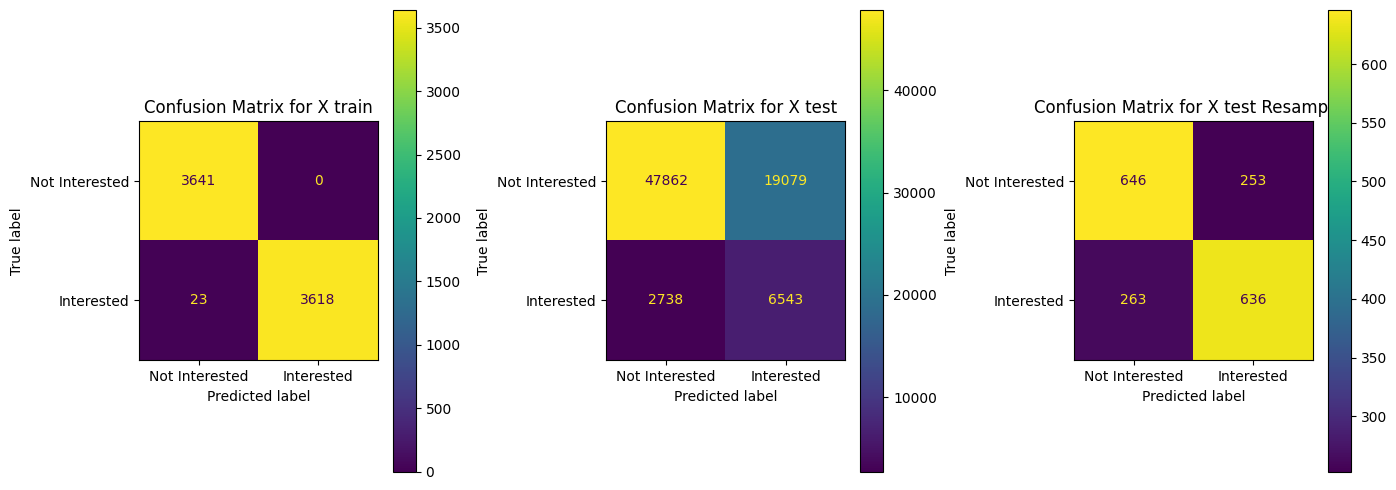

In [215]:
# Visualize Confusion Metrics
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# Confusion Metrics for X train
cm_train = confusion_matrix(y_resampled, y_pred_train_dt)
ConfusionMatrixDisplay(cm_train, display_labels=['Not Interested', 'Interested']).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix for X train')

# Confusion Metrics for X test
cm_test = confusion_matrix(y_test, y_pred_test_dt)
ConfusionMatrixDisplay(cm_test, display_labels=['Not Interested', 'Interested']).plot(ax=ax[1])
ax[1].set_title('Confusion Matrix for X test')

# Confusion Metrics X test Resampled
cm_test_resampled = confusion_matrix(y_test2, y_pred_test2_dt)
ConfusionMatrixDisplay(cm_test_resampled, display_labels=['Not Interested', 'Interested']).plot(ax=ax[2])
ax[2].set_title('Confusion Matrix for X test Resampled')

plt.tight_layout()
plt.show()

Don't forget to also calculate the cross validation value of the train set as the average cross validation value of the train can provide a more realistic estimate of how the model will perform on new data. The average cross validation value of the train also helps detect overfitting.

In [216]:
precision_train_cross_val_dt = cross_val_score(pipe_dt,
                                     X_resampled, y_resampled,
                                     cv=3,
                                     scoring="precision")

print('Precision Score - All - Cross Validation dt    : ', precision_train_cross_val_dt)
print('Precision Score - Mean - Cross Validation dt   : ', precision_train_cross_val_dt.mean())
print('Precision Score - Std - Cross Validation dt    : ', precision_train_cross_val_dt.std())
print('Precision Score - Range of Test-Set dt         : ', (precision_train_cross_val_dt.mean()-precision_train_cross_val_dt.std()) , '-', (precision_train_cross_val_dt.mean()+precision_train_cross_val_dt.std()))

Precision Score - All - Cross Validation dt    :  [0.72212693 0.7087959  0.69455406]
Precision Score - Mean - Cross Validation dt   :  0.7084922984444261
Precision Score - Std - Cross Validation dt    :  0.011258621919905488
Precision Score - Range of Test-Set dt         :  0.6972336765245206 - 0.7197509203643315


We then save the evaluation results to the data frame:

In [217]:
model_dt = {
    'Precision Score - Train': precision_score(y_resampled, y_pred_train_dt),
    'Precision Score - Test': precision_score(y_test, y_pred_test_dt),
    'Precision Score - Test Resampled': precision_score(y_test2, y_pred_test2_dt),
    'Mean Cross Validation - Train' : precision_train_cross_val_dt.mean(),
    'Time - Train' : waktu_train_dt,
    'Time - Predict' : waktu_test_dt
}

# Save into dictionary
result['Model Decision Tree'] = model_dt
df_result = pd.DataFrame(result,index=metrics)
df_result = df_result
df_result

,Model SVC,Model KNN,Model Decision Tree
Precision Score - Train,0.735506,0.791988,1.000000
Precision Score - Test,0.276223,0.269538,0.255366
Precision Score - Test Resampled,0.728086,0.733399,0.715411
Mean Cross Validation - Train,0.735013,0.725435,0.708492
Time - Train,11.804242,0.031034,0.079710
Time - Predict,17.743236,9.188274,0.176175


If we look at the evaluation metrics of the base line Decision Tree, we can see a big difference in the precision score on the test set that has not been undersampled with the test set that has been undersampled. Precision score on the train is 100% while on the resampled test 71% indicates that the dicision tree model is an overfit model. This can happen because we use default parameters so it is natural to overfit. The mean cross validation is 70%. So far, when viewed from the cross-value, the svc base model is still the best. The training and prediction time of decision tree is faster than svc and knn. The original test data has a very low value because the amount of original test data is very large compared to the resampled train data, and also the data in the test is very imbalanced. the distribution of data in the test set is very different from the one of the training/validation set. So that is what causes the original test set value to be very bad.

## 8.4 Random Forest

We will do predictions on the Random Forest model, we do predictions with our x_resampled, x_test and x_test2 data:

In [218]:
%%time
awl_test_rf = time.time()
y_pred_train_rf = pipe_rf.predict(X_resampled)
y_pred_test_rf = pipe_rf.predict(X_test)
y_pred_test2_rf = pipe_rf.predict(X_test2)
waktu_test_rf = time.time() - awl_test_rf

CPU times: user 1.39 s, sys: 8.02 ms, total: 1.4 s
Wall time: 1.41 s


Then we try to see the value of the evaluation metrics, namely the precision score on the three predictions

In [219]:
# Model Evaluation - Precision Score
print('Precision Score - Train Set : ', precision_score(y_resampled, y_pred_train_rf))
print('Precision Score - Test Set : ', precision_score(y_test, y_pred_test_rf))
print('Precision Score - Test Set Resampled : ', precision_score(y_test2, y_pred_test2_rf))

Precision Score - Train Set :  0.9958881578947368
Precision Score - Test Set :  0.2685976245051052
Precision Score - Test Set Resampled :  0.7408506429277942


Let's visualize the confusion metrics of the three predictions

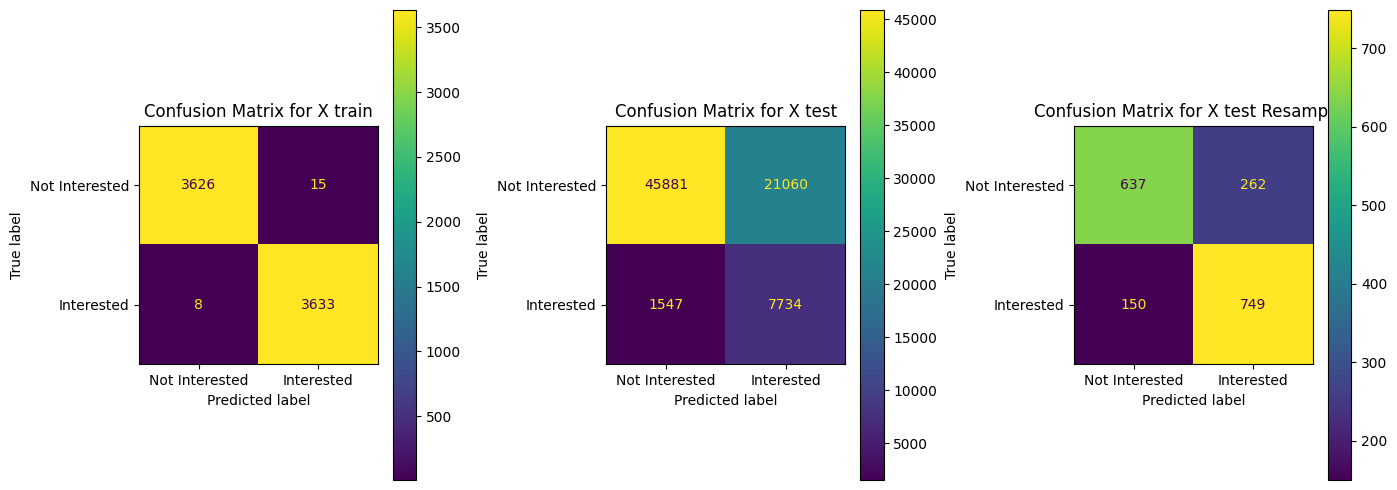

In [220]:
# Visualize Confusion Metrics
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# Confusion Metrics for X train
cm_train = confusion_matrix(y_resampled, y_pred_train_rf)
ConfusionMatrixDisplay(cm_train, display_labels=['Not Interested', 'Interested']).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix for X train')

# Confusion Metrics for X test
cm_test = confusion_matrix(y_test, y_pred_test_rf)
ConfusionMatrixDisplay(cm_test, display_labels=['Not Interested', 'Interested']).plot(ax=ax[1])
ax[1].set_title('Confusion Matrix for X test')

# Confusion Metrics X test Resampled
cm_test_resampled = confusion_matrix(y_test2, y_pred_test2_rf)
ConfusionMatrixDisplay(cm_test_resampled, display_labels=['Not Interested', 'Interested']).plot(ax=ax[2])
ax[2].set_title('Confusion Matrix for X test Resampled')

plt.tight_layout()
plt.show()

Don't forget to also calculate the cross validation value of the train set as the average cross validation value of the train can provide a more realistic estimate of how the model will perform on new data. The average cross validation value of the train also helps detect overfitting.

In [221]:
precision_train_cross_val_rf = cross_val_score(pipe_rf,
                                     X_resampled, y_resampled,
                                     cv=3,
                                     scoring="precision")

print('Precision Score - All - Cross Validation rf    : ', precision_train_cross_val_rf)
print('Precision Score - Mean - Cross Validation rf   : ', precision_train_cross_val_rf.mean())
print('Precision Score - Std - Cross Validation rf    : ', precision_train_cross_val_rf.std())
print('Precision Score - Range of Test-Set rf         : ', (precision_train_cross_val_rf.mean()-precision_train_cross_val_rf.std()) , '-', (precision_train_cross_val_rf.mean()+precision_train_cross_val_rf.std()))

Precision Score - All - Cross Validation rf    :  [0.73490427 0.73552538 0.71753016]
Precision Score - Mean - Cross Validation rf   :  0.7293199364970439
Precision Score - Std - Cross Validation rf    :  0.008340483910269992
Precision Score - Range of Test-Set rf         :  0.7209794525867739 - 0.7376604204073138


We then save the evaluation results to the data frame:

In [222]:
model_rf = {
    'Precision Score - Train': precision_score(y_resampled, y_pred_train_rf),
    'Precision Score - Test': precision_score(y_test, y_pred_test_rf),
    'Precision Score - Test Resampled': precision_score(y_test2, y_pred_test2_rf),
    'Mean Cross Validation - Train' : precision_train_cross_val_rf.mean(),
    'Time - Train' : waktu_train_rf,
    'Time - Predict' : waktu_test_rf
}

# Save into dictionary
result['Model Random Forest'] = model_rf
df_result = pd.DataFrame(result,index=metrics)
df_result

,Model SVC,Model KNN,Model Decision Tree,Model Random Forest
Precision Score - Train,0.735506,0.791988,1.000000,0.995888
Precision Score - Test,0.276223,0.269538,0.255366,0.268598
Precision Score - Test Resampled,0.728086,0.733399,0.715411,0.740851
Mean Cross Validation - Train,0.735013,0.725435,0.708492,0.729320
Time - Train,11.804242,0.031034,0.079710,1.113916
Time - Predict,17.743236,9.188274,0.176175,1.407674


If we look at the evaluation metrics of the base line Random Forest, we can see a big difference in the precision score on the test set that has not been undersampled with the test set that has been undersampled. Precision score on the train is 99% while on the resampled test 74% indicates that the random forest model is an overfit model. This can happen because the parameters we use are default parameters so it is very possible to overfit. This is evident from the mean cross validation which is very far from the train precision score of 72%. The training and prediction time is also quite long compared to the decision tree. So far, the SVC model is still a good fit model compared to the other 3 models. The original test data has a very low value because the amount of original test data is very large compared to the resampled train data, and also the data in the test is very imbalanced. the distribution of data in the test set is very different from the one of the training/validation set. So that is what causes the original test set value to be very bad.

## 8.5 Boosting

We will do predictions on the XG Boost model, we do predictions with our x_resampled, x_test and x_test2 data:

In [223]:
%%time
awl_test_xg = time.time()
y_pred_train_xg = pipe_xg.predict(X_resampled)
y_pred_test_xg = pipe_xg.predict(X_test)
y_pred_test2_xg = pipe_xg.predict(X_test2)
waktu_test_xg = time.time() - awl_test_xg

CPU times: user 651 ms, sys: 4.43 ms, total: 655 ms
Wall time: 601 ms


Then we try to see the value of the evaluation metrics, namely the precision score on the three predictions

In [224]:
# Model Evaluation - Precision Score
print('Precision Score - Train Set : ', precision_score(y_resampled, y_pred_train_xg))
print('Precision Score - Test Set : ', precision_score(y_test, y_pred_test_xg))
print('Precision Score - Test Set Resampled : ', precision_score(y_test2, y_pred_test2_xg))

Precision Score - Train Set :  0.8259137769447048
Precision Score - Test Set :  0.2704242343006501
Precision Score - Test Set Resampled :  0.7323279924599434


Let's visualize the confusion metrics of the three predictions

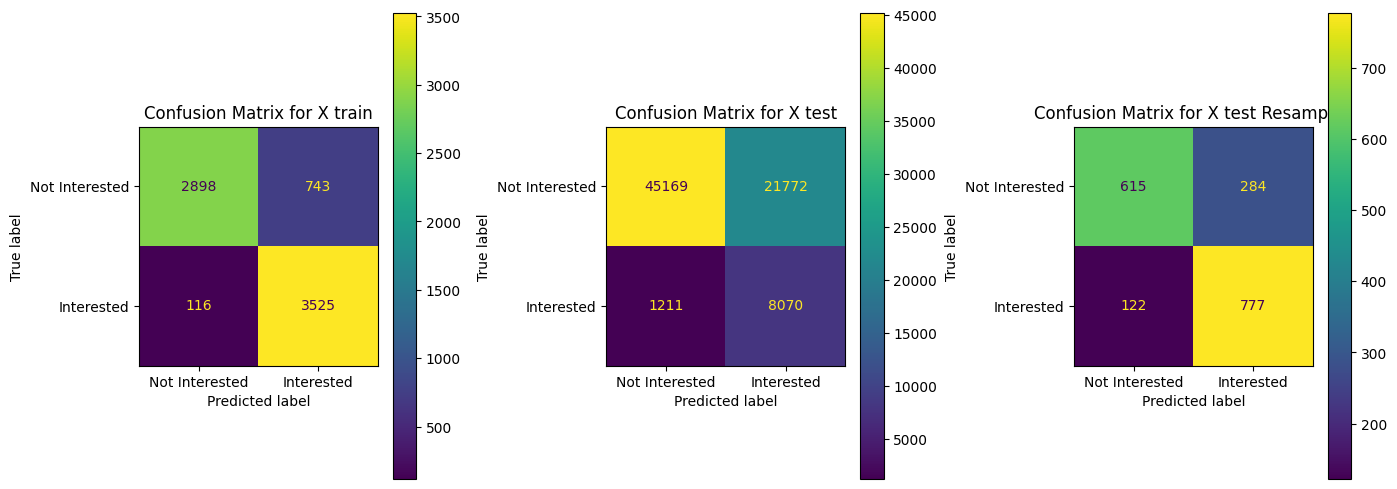

In [225]:
# Visualize Confusion Metrics
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# Confusion Metrics for X train
cm_train = confusion_matrix(y_resampled, y_pred_train_xg)
ConfusionMatrixDisplay(cm_train, display_labels=['Not Interested', 'Interested']).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix for X train')

# Confusion Metrics for X test
cm_test = confusion_matrix(y_test, y_pred_test_xg)
ConfusionMatrixDisplay(cm_test, display_labels=['Not Interested', 'Interested']).plot(ax=ax[1])
ax[1].set_title('Confusion Matrix for X test')

# Confusion Metrics X test Resampled
cm_test_resampled = confusion_matrix(y_test2, y_pred_test2_xg)
ConfusionMatrixDisplay(cm_test_resampled, display_labels=['Not Interested', 'Interested']).plot(ax=ax[2])
ax[2].set_title('Confusion Matrix for X test Resampled')

plt.tight_layout()
plt.show()

Don't forget to also calculate the cross validation value of the train set as the average cross validation value of the train can provide a more realistic estimate of how the model will perform on new data. The average cross validation value of the train also helps detect overfitting.

In [226]:
precision_train_cross_val_xg = cross_val_score(pipe_xg,
                                     X_resampled, y_resampled,
                                     cv=3,
                                     scoring="precision")

print('Precision Score - All - Cross Validation xg    : ', precision_train_cross_val_xg)
print('Precision Score - Mean - Cross Validation xg   : ', precision_train_cross_val_xg.mean())
print('Precision Score - Std - Cross Validation xg    : ', precision_train_cross_val_xg.std())
print('Precision Score - Range of Test-Set xg         : ', (precision_train_cross_val_xg.mean()-precision_train_cross_val_xg.std()) , '-', (precision_train_cross_val_xg.mean()+precision_train_cross_val_xg.std()))

Precision Score - All - Cross Validation xg    :  [0.73134328 0.74120956 0.71173644]
Precision Score - Mean - Cross Validation xg   :  0.7280964307753163
Precision Score - Std - Cross Validation xg    :  0.012249427996645326
Precision Score - Range of Test-Set xg         :  0.715847002778671 - 0.7403458587719616


We then save the evaluation results to the data frame:

In [227]:
model_xg = {
    'Precision Score - Train': precision_score(y_resampled, y_pred_train_xg),
    'Precision Score - Test': precision_score(y_test, y_pred_test_xg),
    'Precision Score - Test Resampled': precision_score(y_test2, y_pred_test2_xg),
    'Mean Cross Validation - Train' : precision_train_cross_val_xg.mean(),
    'Time - Train' : waktu_train_xg,
    'Time - Predict' : waktu_test_xg
}

# Save into dictionary
result['Model XG Boost'] = model_xg
df_result = pd.DataFrame(result,index=metrics)
df_result

,Model SVC,Model KNN,Model Decision Tree,Model Random Forest,Model XG Boost
Precision Score - Train,0.735506,0.791988,1.000000,0.995888,0.825914
Precision Score - Test,0.276223,0.269538,0.255366,0.268598,0.270424
Precision Score - Test Resampled,0.728086,0.733399,0.715411,0.740851,0.732328
Mean Cross Validation - Train,0.735013,0.725435,0.708492,0.729320,0.728096
Time - Train,11.804242,0.031034,0.079710,1.113916,0.188446
Time - Predict,17.743236,9.188274,0.176175,1.407674,0.600842


Jika kita lihat metrics evaluasi dari base line XG Boost, dapat terlihat perbedaan jauh precision score pada test set yang belum dilakukan undersampling dengan test set yang telah dilakukan undersampling. Precision score pada train 82% sedangkan pada test resampled 73% menandakan model svc merupakan model yang overfit. Terbukti dari mean cross validation nya yang jauh nilainya dari precision score trainnya yaitu 72%. Waktu training juga terbilang cukup lama dibandingkan base knn dan decision tree namun trainnya memiliki waktu yang cepat. Sampai perbandingan kelima model nilai cross validation svc lah yang paling bagus dan juga hanya base svc lah yang merupakan model yang goodfit. Data test asli nilainya sangat rendah dikarenakan jumlah data test yang asli sangat banyak dibandingkan data train yang telah di resample, dan juga data pada test sangat imbalanced. the distribution of data in the test set is very different from the one of the training/validation set. Sehingga itu yang menyebabkan nilai test set asli sangat jelek.

# 9. Model Analysis

In [228]:
# Show Evaluation Result
df_result

,Model SVC,Model KNN,Model Decision Tree,Model Random Forest,Model XG Boost
Precision Score - Train,0.735506,0.791988,1.000000,0.995888,0.825914
Precision Score - Test,0.276223,0.269538,0.255366,0.268598,0.270424
Precision Score - Test Resampled,0.728086,0.733399,0.715411,0.740851,0.732328
Mean Cross Validation - Train,0.735013,0.725435,0.708492,0.729320,0.728096
Time - Train,11.804242,0.031034,0.079710,1.113916,0.188446
Time - Predict,17.743236,9.188274,0.176175,1.407674,0.600842


Coba kita lihat nilai ROC_AUC pada semua base model yang telah kita buat:

AUC Score SVC :  0.8279660628977197
AUC Score KNN :  0.8179598886910557
AUC Score Decission Tree :  0.7151612037104631
AUC Score Random Forest :  0.833644724517787
AUC Score XG Boost :  0.8331003054933117


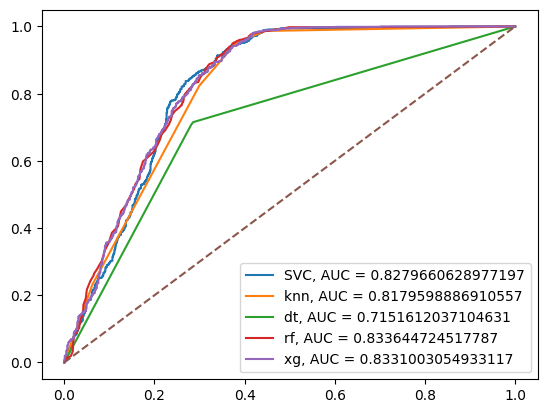

In [229]:
# Get FPR, TPR, and AUC Score from svc
y_pred_proba_svc = pipe_svc.predict_proba(X_test2)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test2, y_pred_proba_svc)
auc_svc = roc_auc_score(y_test2, y_pred_proba_svc)
print('AUC Score SVC : ', auc_svc)

y_pred_proba_knn = pipe_knn.predict_proba(X_test2)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test2, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test2, y_pred_proba_knn)
print('AUC Score KNN : ', auc_knn)

y_pred_proba_dt = pipe_dt.predict_proba(X_test2)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test2, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test2, y_pred_proba_dt)
print('AUC Score Decission Tree : ', auc_dt)

y_pred_proba_rf = pipe_rf.predict_proba(X_test2)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test2, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test2, y_pred_proba_rf)
print('AUC Score Random Forest : ', auc_rf)

y_pred_proba_xg = pipe_xg.predict_proba(X_test2)[:, 1]
fpr_xg, tpr_xg, _ = roc_curve(y_test2, y_pred_proba_xg)
auc_xg = roc_auc_score(y_test2, y_pred_proba_xg)
print('AUC Score XG Boost : ', auc_xg)

# Plot ROC-AUC Curve
plt.figure(0).clf()
plt.plot(fpr_svc, tpr_svc, label='SVC, AUC = ' + str(auc_svc))
plt.plot(fpr_knn, tpr_knn, label='knn, AUC = ' + str(auc_knn))
plt.plot(fpr_dt, tpr_dt, label='dt, AUC = ' + str(auc_dt))
plt.plot(fpr_rf, tpr_rf, label='rf, AUC = ' + str(auc_rf))
plt.plot(fpr_xg, tpr_xg, label='xg, AUC = ' + str(auc_xg))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)

Of the 5 base models that have been made, the results of the metrics evaluation are shown in the table above. Judging from the categories of underfit, goodfit and overfit models, only the KNN & SVC models are classified as goodfit base lines. When viewed from the mean cross validation value on the train set, only the SVC base model has the highest score among the five models.

Why is the SVC cross validation score the highest among the five models?

SVC has strong regularization that helps prevent overfit.
So the SVC model performs better on new data. SVC is also a relatively complex model compared to other models such as KNN and Decision Tree. More complex models can learn more complicated patterns in the data, which can result in better performance.

The ROC-AUC value shows how good the model is at separating the classes. There are 3 base models with the highest AUC Score values, namely the XG Boost, Random Forest and SVC models.

Since only the SVC base model is classified as a good fit and has the best cross validation value and AUC Score, I will choose **the SVC base model** for further hyperparameter tuning.

# Hyperparameter Tuning

We will do hyperparameter tuning with C, kernel, degree and gamma parameters. First I do the tuning with the center value being the default value. Then I move the lower and upper ranges to see whether it is better to increase or decrease the parameter values. I also attached the results of my tuning experiment in the markdown below:

**First Try**
```
# Define the parameter grid for GridSearchCV
param_grid_svc = {
    'svc__C' : [0.1,0.01,1,20,50],
    'svc__kernel' : ['linear','rbf','poly'],
    'svc__gamma' : ['auto','scale']
}

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'svc__C': 0.01, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
Best Precision score: 0.7431323672251006
CPU times: user 10.5 s, sys: 1.65 s, total: 12.1 s
Wall time: 16min 42s
```

**Second Try**
```
# Define the parameter grid for GridSearchCV
param_grid_svc = {
    'svc__C' : [0.01,0.05,0.08,0.1,1],
    'svc__kernel' : ['poly'],
    'svc__degree' : [1,3,10,20],
    'svc__gamma' : ['auto']
}

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'svc__C': 0.05, 'svc__degree': 10, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
Best Precision score: 0.7583759067586695
CPU times: user 4.57 s, sys: 373 ms, total: 4.94 s
Wall time: 1min 45s
```

**Third Try**
```
# Define the parameter grid for GridSearchCV
param_grid_svc = {
    'svc__C' : [0.03,0.04,0.05,0.07],
    'svc__kernel' : ['poly'],
    'svc__degree' : [9,10,11],
    'svc__gamma' : ['auto']
}

Best parameters: {'svc__C': 0.07, 'svc__degree': 9, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
Best Precision score: 0.7602476493311494
CPU times: user 4.26 s, sys: 279 ms, total: 4.54 s
Wall time: 1min 24s
```

**Fourth Try (Final)**
```
# Define the parameter grid for GridSearchCV
param_grid_svc = {
    'svc__C' : [0.06,0.07,0.08,0.09],
    'svc__kernel' : ['poly'],
    'svc__degree' : [5,6,7,9],
    'svc__gamma' : ['auto']
}

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'svc__C': 0.06, 'svc__degree': 9, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
Best Precision score: 0.7605903217141116
CPU times: user 3.9 s, sys: 257 ms, total: 4.15 s
Wall time: 1min 27s
```

So we set the result of the fourth experiment as our best parameter

In [230]:
# Define the parameter grid for GridSearchCV
param_grid_svc = {
    'svc__C' : [0.06],
    'svc__kernel' : ['poly'],
    'svc__degree' : [9],
    'svc__gamma' : ['auto'],
    'svc__probability' : [True]
}

In [231]:
# Create a GridSearchCV object
%%time
grid_svc = GridSearchCV(pipe_svc,
                        param_grid=param_grid_svc,
                        verbose=3,
                        refit=True,
                        scoring ='precision',
                        cv=3,
                        return_train_score=True,
                        n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_svc.fit(X_resampled, y_resampled)

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_svc.best_params_)
print("Best Precision score:", grid_svc.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {'svc__C': 0.06, 'svc__degree': 9, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__probability': True}
Best Precision score: 0.7605903217141116
CPU times: user 12.6 s, sys: 149 ms, total: 12.7 s
Wall time: 33.7 s


After getting the best parameters using the grid search method with a precision best score of 0.76, then we save it to the pipeline and predict.

In [232]:
# Get Best Estimator
svc_gridcv_best = grid_svc.best_estimator_

We predict the train set, test set and resampled test set.

In [233]:
# Predict with Best Parameters and Default Threshold Train
awl_test_svc_default = time.time()
y_pred_newd = svc_gridcv_best.predict(X_resampled)

# Predict with Best Parameters and Default Threshold Test Resampled
y_pred_new_td = svc_gridcv_best.predict(X_test)

# Predict with Best Parameters and Default Threshold Test Resampled
y_pred_new_t2d = svc_gridcv_best.predict(X_test2)
waktu_test_svc_default = time.time() - awl_test_svc_default

We try to change the threshold on our best model, because we want to see the difference in change if we change the threshold value.

This threshold change can be done for the following reasons:
- Improve the balance between precision and sensitivity.
- Reducing False Positive (because the metrics used are Precision Score)
- Optimizing model performance on new data.

In [234]:
# Predict with Best Parameters and Change Threshold Train
awl_test_svc_tuning = time.time()
y_pred_new = svc_gridcv_best.predict_proba(X_resampled)
y_pred_new_train = np.where(y_pred_new[:,1] >= 0.90, 1, 0)

# Predict with Best Parameters and Change Threshold Test Resampled
y_pred_new_t = svc_gridcv_best.predict_proba(X_test)
y_pred_new_test = np.where(y_pred_new_t[:,1] >= 0.90, 1, 0)

# Predict with Best Parameters and Change Threshold Test Resampled
y_pred_new_t2 = svc_gridcv_best.predict_proba(X_test2)
y_pred_new_test2 = np.where(y_pred_new_t2[:,1] >= 0.90, 1, 0)

waktu_test_svc_tuning = time.time() - awl_test_svc_tuning
precision_train_cross_val_svc_tuning = cross_val_score(svc_gridcv_best,
                                     X_resampled, y_resampled,
                                     cv=3,
                                     scoring="precision")

Let's visualize it with confusion metrics

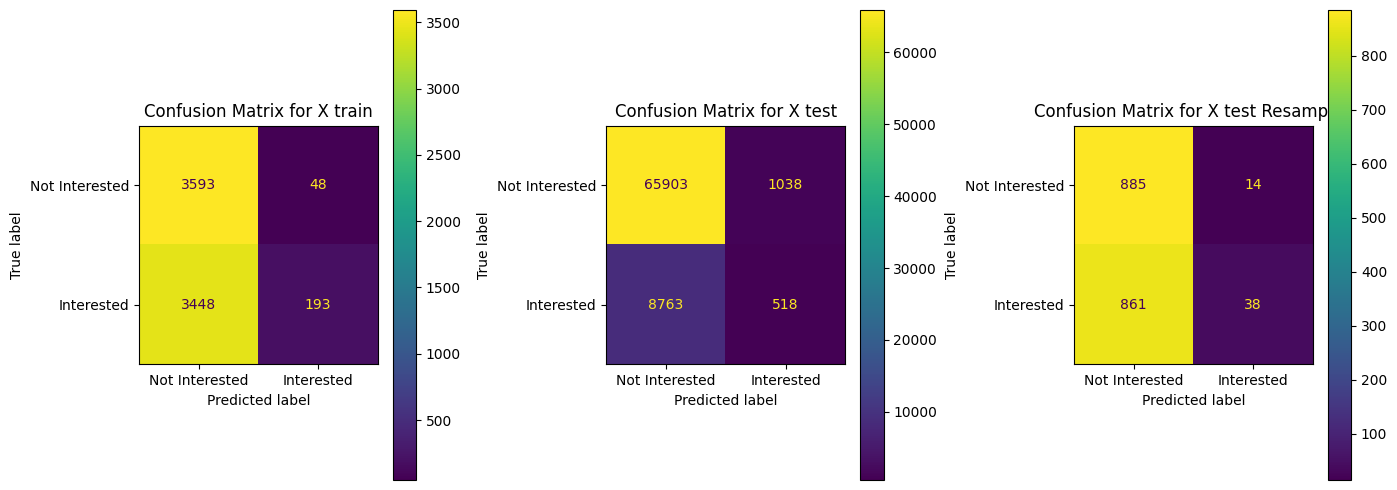

In [235]:
# Visualize Confusion Metrics
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# Confusion Metrics for X train
cm_train = confusion_matrix(y_resampled, y_pred_new_train)
ConfusionMatrixDisplay(cm_train, display_labels=['Not Interested', 'Interested']).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix for X train')

# Confusion Metrics for X test
cm_test = confusion_matrix(y_test, y_pred_new_test)
ConfusionMatrixDisplay(cm_test, display_labels=['Not Interested', 'Interested']).plot(ax=ax[1])
ax[1].set_title('Confusion Matrix for X test')

# Confusion Metrics X test Resampled
cm_test_resampled = confusion_matrix(y_test2, y_pred_new_test2)
ConfusionMatrixDisplay(cm_test_resampled, display_labels=['Not Interested', 'Interested']).plot(ax=ax[2])
ax[2].set_title('Confusion Matrix for X test Resampled')

plt.tight_layout()
plt.show()

Then we put it into a table to make it easier to evaluate:

In [236]:
# Create a function to calculate the evaluation results
best_model = {}
metrics = ['Precision Score - Train','Precision Score Tuning Default Threshold - Train', 'Precision Score Tuning Threshold 0.9 - Train', 'Precision Score - Test', 'Precision Score Tuning Default Threshold - Test', 'Precision Score Tuning Threshold 0.9 - Test',
           'Precision Score - Test Resampled', 'Precision Score Tuning Default Threshold - Test Resampled', 'Precision Score Tuning Threshold 0.9 - Test Resampled',
           'Mean Cross Validation - Train','Mean Cross Validation Tuning - Train','Time - Train','Time - Predict', 'Time Tuning - Predict']

model_svc = {
    'Precision Score - Train': precision_score(y_resampled, y_pred_train_svc),
    'Precision Score Tuning Default Threshold - Train': precision_score(y_resampled, y_pred_newd),
    'Precision Score Tuning Threshold 0.9 - Train': precision_score(y_resampled, y_pred_new_train),
    'Precision Score - Test': precision_score(y_test, y_pred_test_svc),
    'Precision Score Tuning Default Threshold - Test': precision_score(y_test, y_pred_new_td),
    'Precision Score Tuning Threshold 0.9 - Test': precision_score(y_test, y_pred_new_test),
    'Precision Score - Test Resampled': precision_score(y_test2, y_pred_test2_svc),
    'Precision Score Tuning Default Threshold - Test Resampled':precision_score(y_test2, y_pred_new_t2d),
    'Precision Score Tuning Threshold 0.9 - Test Resampled':precision_score(y_test2, y_pred_new_test2),
    'Mean Cross Validation - Train' : precision_train_cross_val_svc.mean(),
    'Mean Cross Validation Tuning - Train' : precision_train_cross_val_svc_tuning.mean(),
    'Time - Train' : waktu_train_svc,
    'Time - Predict' : waktu_test_svc,
    'Time Tuning - Predict': waktu_test_svc_tuning
}

# Save into dictionary
best_model['Best Model SVC'] = model_svc
df_best_model = pd.DataFrame(best_model,index=metrics)
df_best_model

,Best Model SVC
Precision Score - Train,0.735506
Precision Score Tuning Default Threshold - Train,0.758055
Precision Score Tuning Threshold 0.9 - Train,0.800830
Precision Score - Test,0.276223
Precision Score Tuning Default Threshold - Test,0.281636
Precision Score Tuning Threshold 0.9 - Test,0.332905
Precision Score - Test Resampled,0.728086
Precision Score Tuning Default Threshold - Test Resampled,0.719902
Precision Score Tuning Threshold 0.9 - Test Resampled,0.730769
Mean Cross Validation - Train,0.735013


If we look at the table of evaluation score results on our best SVC model, we can see that the precision score value increases from the beginning, then tuned, to the changed threshold value. Only the resampled test value drops when tuned, but rises again after changing the threshold. This happens because of a coincidence. Because we see the cross validation value that shows the actual value. The cross validation value increases from before tuning and after tuning. Our best model can be categorized as goodfit with a precision score train value after tuning with a threshold of 0.9 80% and a precision score test resampled value after tuning with a threshold of 0.9 74%. So that the best model results after tuning and threshold changes can be categorized as a good fit model.
The original test data is very low because the amount of original test data is very much compared to the resampled train data, and also the data in the test is very imbalanced. the distribution of data in the test set is very different from the one of the training/validation set. So that's what causes the original test set value to be very bad.

Let's look at the ROC-AUC value.

AUC Score SVC Before Tuning :  0.8279660628977197
AUC Score SVC After Tuning :  0.8013155143336868


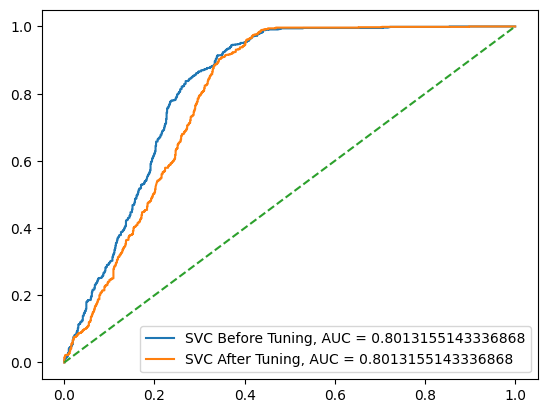

In [237]:
# Get FPR, TPR, and AUC Score from SVC Before Tuning and SVC After Tuning
y_pred_proba_svc = pipe_svc.predict_proba(X_test2)[:, 1]
fpr_base, tpr_base, _ = roc_curve(y_test2, y_pred_proba_svc)
auc_svc = roc_auc_score(y_test2, y_pred_proba_svc)
print('AUC Score SVC Before Tuning : ', auc_svc)

y_pred_proba_svc = svc_gridcv_best.predict_proba(X_test2)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test2, y_pred_proba_svc)
auc_svc = roc_auc_score(y_test2, y_pred_proba_svc)
print('AUC Score SVC After Tuning : ', auc_svc)

# Plot ROC-AUC Curve
plt.figure(0).clf()
plt.plot(fpr_base, tpr_base, label='SVC Before Tuning, AUC = ' + str(auc_svc))
plt.plot(fpr_svc, tpr_svc, label='SVC After Tuning, AUC = ' + str(auc_svc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)

We can see that the AUC value before tuning and after tuning has the same value of 0.80.Because the value is close to 1, so our model has a good performance in separating the two classes.

# 11. Model Saving

In [238]:
with open('pipe_svc.pkl', 'wb') as file_2:
  pickle.dump(pipe_svc,file_2)

In [239]:
with open('svc_gridcv_best.pkl', 'wb') as file_1:
  pickle.dump(svc_gridcv_best,file_1)

# 12. Conclusion

In [240]:
# Show Evaluation Metrics From Best Model
df_best_model

,Best Model SVC
Precision Score - Train,0.735506
Precision Score Tuning Default Threshold - Train,0.758055
Precision Score Tuning Threshold 0.9 - Train,0.800830
Precision Score - Test,0.276223
Precision Score Tuning Default Threshold - Test,0.281636
Precision Score Tuning Threshold 0.9 - Test,0.332905
Precision Score - Test Resampled,0.728086
Precision Score Tuning Default Threshold - Test Resampled,0.719902
Precision Score Tuning Threshold 0.9 - Test Resampled,0.730769
Mean Cross Validation - Train,0.735013


**Conclusion from our model**

Of the five models we have created, the SVC model is the one we chose as the best model because the evaluation results are goodfit, the AUC value is high, and the cross validation value is the best among other models. With a precision train value of 80% and a resampled test precision of 74%, our SVC model falls into the goodfit category.

Because the precision score of 74% on the test has a meaning: Of the 100 people we predict as customers who are interested in our company's vehicle insurance. If this model is used to predict 100 people, it is likely that 74 people are really interested customers.

**Kelebihan:**
- The best model created produces a goodfit model with a recall percentage of 74%. So that it can predict customers who are really interested as much as 74%.

**Kelemahan:**
- The model is trained with a dataset that only has 2 nominal columns with which the correlation is not high. With large data and only 2 nominal columns, this may be the reason why the model has evaluation results in the 70s.
- The dataset used also has an imbalanced target column so undersampling is done because if it is not done, the model will be smarter in predicting targets that dominate.

**Improvement**
- I processed my data handling imbalanced with the undersampling method, later so that it can be tried with the oversampling and SMOTENC methods. So that we can find out whether the model results become better in predicting the targets.

**Conclusion from EDA**
- The data in the target column or dependent column is not balanced with a percentage split of 88% and 12%.
- Customers who are interested in insurance are dominated by male gender.
- Customers who are interested in insurance have a lower average annual premium with a value of 30419.
- Customers who are interested in our insurance are on average 43 years old with an age range of adult (26-44 years).
- Customers who are interested in our insurance also have the most vehicles with a vehicle age of 1-2 years.

**Business Insight:**

The response column in the Health Insurance Cross-Sell Prediction dataset can be used to get various business insights that can help companies to improve their cross-selling strategy.

- Customers who are interested in vehicle insurance
  We can do targeting so that our insurance sales are not misdirected.
- Customers who are not interested in vehicle insurance
  We can influence them without making them feel disturbed by the marketing that is being done so that it will increase the chance of customers' interest in vehicle insurance.

